## Check R version and load necessary libraries

In [1]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           

In [1]:
library(devtools)
library(ktplots)
library(dplyr)
library(Seurat)
library(readxl)
library(stringr)
library(ggplot2)
library(tidyr)
library(dplyr)

Loading required package: usethis

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
options(repr.matrix.max.cols=150)

## Load pathways excel and create common column

In [94]:
pathways <- read_excel('./20220428_interaction_input_ordering_ManualAnnotation_swap_pathways.xlsx')

In [95]:
pathways$interacting_pair_new <- paste(pathways$partner_a, pathways$partner_b, sep = ':')
head(pathways, 2)

partner_a                  partner_b protein_name_a            
1 12oxoLeukotrieneB4_byPTGR1 Q15722    12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1 Q9NPC1    12oxoLeukotrieneB4_byPTGR1
  protein_name_b is_ppi curator       comments interaction_label interaction_a
1 LT4R1_HUMAN    FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
2 LT4R2_HUMAN    FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
  interaction_b interaction_a_manual interaction_b_manual Pathway    
1 receptor      ligand               receptor             Leukotriene
2 receptor      ligand               receptor             Leukotriene
  Pathway_specific Pathway_alternative interaction_manual_label
1 NA               NA                  ligand-receptor         
2 NA               NA                  ligand-receptor         
  partner_a_swap             partner_b_swap protein_name_a_swap       
1 12oxoLeukotrieneB4_byPTGR1 Q15722         12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1 Q9NPC1         12oxoLeukotrieneB4_byPTGR1
  protein_name_b_swap interaction_manual_label_swap Common pathways
1 LT4R1_HUMAN         ligand-receptor               NA             
2 LT4R2_HUMAN         ligand-receptor               NA             
  interacting_pair_new             
1 12oxoLeukotrieneB4_byPTGR1:Q15722
2 12oxoLeukotrieneB4_byPTGR1:Q9NPC1

## Load CellPhoneDB results and create common column

In [96]:
trial <- read.delim("/home/jovyan/1_FIBROSIS/cpdb_out/statistical_analysis_pvalues_06_07_2023_15:19:27.txt", check.names = FALSE)

In [97]:
head(trial)

id_cp_interaction interacting_pair                    
1 CPI-CS0A5B6BD7A   12oxoLeukotrieneB4_byPTGR1_LTB4R    
2 CPI-CS047D9C0D7   LeukotrieneB4_byLTA4H_LTB4R         
3 CPI-CS04A56D5BE   12oxoLeukotrieneB4_byPTGR1_LTB4R2   
4 CPI-CS0F5B070C5   LeukotrieneB4_byLTA4H_LTB4R2        
5 CPI-CS08D535BCF   22Hydroxycholesterol_byCYP11A1_NR1H4
6 CPI-CS01C347639   22Hydroxycholesterol_byCYP3A4_NR1H4 
  partner_a                              partner_b     gene_a gene_b secreted
1 complex:12oxoLeukotrieneB4_byPTGR1     simple:Q15722        LTB4R  True    
2 complex:LeukotrieneB4_byLTA4H          simple:Q15722        LTB4R  True    
3 complex:12oxoLeukotrieneB4_byPTGR1     simple:Q9NPC1        LTB4R2 True    
4 complex:LeukotrieneB4_byLTA4H          simple:Q9NPC1        LTB4R2 True    
5 complex:22Hydroxycholesterol_byCYP11A1 simple:Q96RI1        NR1H4  True    
6 complex:22Hydroxycholesterol_byCYP3A4  simple:Q96RI1        NR1H4  True    
  receptor_a receptor_b annotation_strategy is_integrin
1 False      True       curated             False      
2 False      True       curated             False      
3 False      True       curated             False      
4 False      True       curated             False      
5 False      True       curated             False      
6 False      True       curated             False      
  Muscle_art_smc|Muscle_art_smc Muscle_art_smc|Muscle_ven_smc_pc
1 1                             1                               
2 1                             1                               
3 1                             1                               
4 1                             1                               
5 1                             1                               
6 1                             1                               
  Muscle_art_smc|Muscle_cap_pc Muscle_art_smc|Muscle_ven_ec_2
1 1                            1                             
2 1                            1                             
3 1                            1                             
4 1                            1                             
5 1                            1                             
6 1                            1                             
  Muscle_art_smc|Muscle_art_ec_2 Muscle_art_smc|Muscle_ven_ec_1
1 1                              1                             
2 1                              1                             
3 1                              1                             
4 1                              1                             
5 1                              1                             
6 1                              1                             
  Muscle_art_smc|Muscle_myo_cap_ec Muscle_art_smc|Muscle_art_ec_1
1 1                                1                             
2 1                                1                             
3 1                                1                             
4 1                                1                             
5 1                                1                             
6 1                                1                             
  Muscle_art_smc|Muscle_adip_cap_ec Muscle_ven_smc_pc|Muscle_art_smc
1 1                                 1                               
2 1                                 1                               
3 1                                 1                               
4 1                                 1                               
5 1                                 1                               
6 1                                 1                               
  Muscle_ven_smc_pc|Muscle_ven_smc_pc Muscle_ven_smc_pc|Muscle_cap_pc
1 1                                   1                              
2 1                                   1                              
3 1                                   1                              
4 1                                   1                              
5 1                              

In [98]:
## Convert p-values into significant or not significant
trial[, -(1:11)] <- trial[, -(1:11)] <= 0.05  # -vals bellow 0.05 = TRUE and above are FALSE
#trial[, 12:2612] <- trial[, 12:2612] <= 0.05  # -vals bellow 0.05 = TRUE and above are FALSE
cols <- sapply(trial, is.logical)  # convert boolean values into integer values
trial[,cols] <- lapply(trial[,cols], as.numeric)

In [99]:
z<-c()
for (i in 1:nrow(trial)) { #
    #print(paste(str_split(trial$partner_a[i], ':', simplify = T)[2]))
    z <- append(z, paste(str_split(trial$partner_a[i], ':', simplify = T)[2], str_split(trial$partner_b[i], ':', simplify = T)[2], sep = ':'))
}
trial$interacting_pair_new <- z
head(trial,2)

id_cp_interaction interacting_pair                
1 CPI-CS0A5B6BD7A   12oxoLeukotrieneB4_byPTGR1_LTB4R
2 CPI-CS047D9C0D7   LeukotrieneB4_byLTA4H_LTB4R     
  partner_a                          partner_b     gene_a gene_b secreted
1 complex:12oxoLeukotrieneB4_byPTGR1 simple:Q15722        LTB4R  True    
2 complex:LeukotrieneB4_byLTA4H      simple:Q15722        LTB4R  True    
  receptor_a receptor_b annotation_strategy is_integrin
1 False      True       curated             False      
2 False      True       curated             False      
  Muscle_art_smc|Muscle_art_smc Muscle_art_smc|Muscle_ven_smc_pc
1 0                             0                               
2 0                             0                               
  Muscle_art_smc|Muscle_cap_pc Muscle_art_smc|Muscle_ven_ec_2
1 0                            0                             
2 0                            0                             
  Muscle_art_smc|Muscle_art_ec_2 Muscle_art_smc|Muscle_ven_ec_1
1 0                              0                             
2 0                              0                             
  Muscle_art_smc|Muscle_myo_cap_ec Muscle_art_smc|Muscle_art_ec_1
1 0                                0                             
2 0                                0                             
  Muscle_art_smc|Muscle_adip_cap_ec Muscle_ven_smc_pc|Muscle_art_smc
1 0                                 0                               
2 0                                 0                               
  Muscle_ven_smc_pc|Muscle_ven_smc_pc Muscle_ven_smc_pc|Muscle_cap_pc
1 0                                   0                              
2 0                                   0                              
  Muscle_ven_smc_pc|Muscle_ven_ec_2 Muscle_ven_smc_pc|Muscle_art_ec_2
1 0                                 0                                
2 0                                 0                                
  Muscle_ven_smc_pc|Muscle_ven_ec_1 Muscle_ven_smc_pc|Muscle_myo_cap_ec
1 0                                 0                                  
2 0                                 0                                  
  Muscle_ven_smc_pc|Muscle_art_ec_1 Muscle_ven_smc_pc|Muscle_adip_cap_ec
1 0                                 0                                   
2 0                                 0                                   
  Muscle_cap_pc|Muscle_art_smc Muscle_cap_pc|Muscle_ven_smc_pc
1 0                            0                              
2 0                            0                              
  Muscle_cap_pc|Muscle_cap_pc Muscle_cap_pc|Muscle_ven_ec_2
1 0                           0                            
2 0                           0                            
  Muscle_cap_pc|Muscle_art_ec_2 Muscle_cap_pc|Muscle_ven_ec_1
1 0                             0                            
2 0                             0                            
  Muscle_cap_pc|Muscle_myo_cap_ec Muscle_cap_pc|Muscle_art_ec_1
1 0                               0                            
2 0                               0                            
  Muscle_cap_pc|Muscle_adip_cap_ec Muscle_ven_ec_2|Muscle_art_smc
1 0                                0                             
2 0                                0                             
  Muscle_ven_ec_2|Muscle_ven_smc_pc Muscle_ven_ec_2|Muscle_cap_pc
1 0                                 0                            
2 0                                 0                            
  Muscle_ven_ec_2|Muscle_ven_ec_2 Muscle_ven_ec_2|Muscle_art_ec_2
1 0                               0                              
2 0                               0                              
  Muscle_ven_ec_2|Muscle_ven_ec_1 Muscle_ven_ec_2|Muscle_myo_cap_ec
1 0                               0                                
2 0                               0                                
  Muscle_ven_ec_2|Muscle_art_ec_1 Muscle_ven_ec_2|Muscle_adip_cap_ec
1 0   

## Merge dataframes

In [100]:
merged_dfs <- merge(trial, pathways[, c('interacting_pair_new', 'Pathway')], by = 'interacting_pair_new')
head(merged_dfs,2)

interacting_pair_new              id_cp_interaction
1 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
2 12oxoLeukotrieneB4_byPTGR1:Q9NPC1 CPI-CS04A56D5BE  
  interacting_pair                  partner_a                         
1 12oxoLeukotrieneB4_byPTGR1_LTB4R  complex:12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1_LTB4R2 complex:12oxoLeukotrieneB4_byPTGR1
  partner_b     gene_a gene_b secreted receptor_a receptor_b
1 simple:Q15722        LTB4R  True     False      True      
2 simple:Q9NPC1        LTB4R2 True     False      True      
  annotation_strategy is_integrin Muscle_art_smc|Muscle_art_smc
1 curated             False       0                            
2 curated             False       0                            
  Muscle_art_smc|Muscle_ven_smc_pc Muscle_art_smc|Muscle_cap_pc
1 0                                0                           
2 0                                0                           
  Muscle_art_smc|Muscle_ven_ec_2 Muscle_art_smc|Muscle_art_ec_2
1 0                              0                             
2 0                              0                             
  Muscle_art_smc|Muscle_ven_ec_1 Muscle_art_smc|Muscle_myo_cap_ec
1 0                              0                               
2 0                              0                               
  Muscle_art_smc|Muscle_art_ec_1 Muscle_art_smc|Muscle_adip_cap_ec
1 0                              0                                
2 0                              0                                
  Muscle_ven_smc_pc|Muscle_art_smc Muscle_ven_smc_pc|Muscle_ven_smc_pc
1 0                                0                                  
2 0                                0                                  
  Muscle_ven_smc_pc|Muscle_cap_pc Muscle_ven_smc_pc|Muscle_ven_ec_2
1 0                               0                                
2 0                               0                                
  Muscle_ven_smc_pc|Muscle_art_ec_2 Muscle_ven_smc_pc|Muscle_ven_ec_1
1 0                                 0                                
2 0                                 0                                
  Muscle_ven_smc_pc|Muscle_myo_cap_ec Muscle_ven_smc_pc|Muscle_art_ec_1
1 0                                   0                                
2 0                                   0                                
  Muscle_ven_smc_pc|Muscle_adip_cap_ec Muscle_cap_pc|Muscle_art_smc
1 0                                    0                           
2 0                                    0                           
  Muscle_cap_pc|Muscle_ven_smc_pc Muscle_cap_pc|Muscle_cap_pc
1 0                               0                          
2 0                               0                          
  Muscle_cap_pc|Muscle_ven_ec_2 Muscle_cap_pc|Muscle_art_ec_2
1 0                             0                            
2 0                             0                            
  Muscle_cap_pc|Muscle_ven_ec_1 Muscle_cap_pc|Muscle_myo_cap_ec
1 0                             0                              
2 0                             0                              
  Muscle_cap_pc|Muscle_art_ec_1 Muscle_cap_pc|Muscle_adip_cap_ec
1 0                             0                               
2 0                             0                               
  Muscle_ven_ec_2|Muscle_art_smc Muscle_ven_ec_2|Muscle_ven_smc_pc
1 0                              0                                
2 0                              0                                
  Muscle_ven_ec_2|Muscle_cap_pc Muscle_ven_ec_2|Muscle_ven_ec_2
1 0                             0                              
2 0                             0                              
  Muscle_ven_ec_2|Muscle_art_ec_2 Muscle_ven_ec_2|Muscle_ven_ec_1
1 0                               0                              
2 0                               0                              
  Muscle_ven_ec_2|Muscle_myo_cap_ec Muscle_ven_ec_2|Muscle_art_ec_1
1 0 

In [101]:
head(merged_dfs,2)

interacting_pair_new              id_cp_interaction
1 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
2 12oxoLeukotrieneB4_byPTGR1:Q9NPC1 CPI-CS04A56D5BE  
  interacting_pair                  partner_a                         
1 12oxoLeukotrieneB4_byPTGR1_LTB4R  complex:12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1_LTB4R2 complex:12oxoLeukotrieneB4_byPTGR1
  partner_b     gene_a gene_b secreted receptor_a receptor_b
1 simple:Q15722        LTB4R  True     False      True      
2 simple:Q9NPC1        LTB4R2 True     False      True      
  annotation_strategy is_integrin Muscle_art_smc|Muscle_art_smc
1 curated             False       0                            
2 curated             False       0                            
  Muscle_art_smc|Muscle_ven_smc_pc Muscle_art_smc|Muscle_cap_pc
1 0                                0                           
2 0                                0                           
  Muscle_art_smc|Muscle_ven_ec_2 Muscle_art_smc|Muscle_art_ec_2
1 0                              0                             
2 0                              0                             
  Muscle_art_smc|Muscle_ven_ec_1 Muscle_art_smc|Muscle_myo_cap_ec
1 0                              0                               
2 0                              0                               
  Muscle_art_smc|Muscle_art_ec_1 Muscle_art_smc|Muscle_adip_cap_ec
1 0                              0                                
2 0                              0                                
  Muscle_ven_smc_pc|Muscle_art_smc Muscle_ven_smc_pc|Muscle_ven_smc_pc
1 0                                0                                  
2 0                                0                                  
  Muscle_ven_smc_pc|Muscle_cap_pc Muscle_ven_smc_pc|Muscle_ven_ec_2
1 0                               0                                
2 0                               0                                
  Muscle_ven_smc_pc|Muscle_art_ec_2 Muscle_ven_smc_pc|Muscle_ven_ec_1
1 0                                 0                                
2 0                                 0                                
  Muscle_ven_smc_pc|Muscle_myo_cap_ec Muscle_ven_smc_pc|Muscle_art_ec_1
1 0                                   0                                
2 0                                   0                                
  Muscle_ven_smc_pc|Muscle_adip_cap_ec Muscle_cap_pc|Muscle_art_smc
1 0                                    0                           
2 0                                    0                           
  Muscle_cap_pc|Muscle_ven_smc_pc Muscle_cap_pc|Muscle_cap_pc
1 0                               0                          
2 0                               0                          
  Muscle_cap_pc|Muscle_ven_ec_2 Muscle_cap_pc|Muscle_art_ec_2
1 0                             0                            
2 0                             0                            
  Muscle_cap_pc|Muscle_ven_ec_1 Muscle_cap_pc|Muscle_myo_cap_ec
1 0                             0                              
2 0                             0                              
  Muscle_cap_pc|Muscle_art_ec_1 Muscle_cap_pc|Muscle_adip_cap_ec
1 0                             0                               
2 0                             0                               
  Muscle_ven_ec_2|Muscle_art_smc Muscle_ven_ec_2|Muscle_ven_smc_pc
1 0                              0                                
2 0                              0                                
  Muscle_ven_ec_2|Muscle_cap_pc Muscle_ven_ec_2|Muscle_ven_ec_2
1 0                             0                              
2 0                             0                              
  Muscle_ven_ec_2|Muscle_art_ec_2 Muscle_ven_ec_2|Muscle_ven_ec_1
1 0                               0                              
2 0                               0                              
  Muscle_ven_ec_2|Muscle_myo_cap_ec Muscle_ven_ec_2|Muscle_art_ec_1
1 0 

## Remove inter-organ cell pairs <u>or</u> subset organ

In [102]:
#Remove inter-organ cell pairs
#merged_dfs_temp <- merged_dfs[, c(13:(ncol(merged_dfs)-1))]
#print(paste0('cell pairs before: ', ncol(merged_dfs_temp)))
#merged_dfs_temp <- merged_dfs_temp[,grep("Uterus.*Uterus|Heart.*Heart|Lung.*Lung", colnames(merged_dfs_temp))]
#print(paste0('cell pairs after: ', ncol(merged_dfs_temp)))
#merged_dfs <- cbind(merged_dfs[,append(1:12, ncol(merged_dfs))], merged_dfs_temp)
#head(merged_dfs,2)

In [103]:
#Subset organ
merged_dfs_temp <- merged_dfs[, c(13:(ncol(merged_dfs)-1))]
#print(paste0('# cell pairs before: ', ncol(merged_dfs_temp)))
#merged_dfs_temp <- merged_dfs_temp[,grep("Heart.*Heart", colnames(merged_dfs_temp))]
#print(paste0('# cell pairs after: ', ncol(merged_dfs_temp)))
merged_dfs <- cbind(merged_dfs[,append(1:12, ncol(merged_dfs))], merged_dfs_temp)
head(merged_dfs,2)

interacting_pair_new              id_cp_interaction
1 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
2 12oxoLeukotrieneB4_byPTGR1:Q9NPC1 CPI-CS04A56D5BE  
  interacting_pair                  partner_a                         
1 12oxoLeukotrieneB4_byPTGR1_LTB4R  complex:12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1_LTB4R2 complex:12oxoLeukotrieneB4_byPTGR1
  partner_b     gene_a gene_b secreted receptor_a receptor_b
1 simple:Q15722        LTB4R  True     False      True      
2 simple:Q9NPC1        LTB4R2 True     False      True      
  annotation_strategy is_integrin Pathway     Muscle_art_smc|Muscle_art_smc
1 curated             False       Leukotriene 0                            
2 curated             False       Leukotriene 0                            
  Muscle_art_smc|Muscle_ven_smc_pc Muscle_art_smc|Muscle_cap_pc
1 0                                0                           
2 0                                0                           
  Muscle_art_smc|Muscle_ven_ec_2 Muscle_art_smc|Muscle_art_ec_2
1 0                              0                             
2 0                              0                             
  Muscle_art_smc|Muscle_ven_ec_1 Muscle_art_smc|Muscle_myo_cap_ec
1 0                              0                               
2 0                              0                               
  Muscle_art_smc|Muscle_art_ec_1 Muscle_art_smc|Muscle_adip_cap_ec
1 0                              0                                
2 0                              0                                
  Muscle_ven_smc_pc|Muscle_art_smc Muscle_ven_smc_pc|Muscle_ven_smc_pc
1 0                                0                                  
2 0                                0                                  
  Muscle_ven_smc_pc|Muscle_cap_pc Muscle_ven_smc_pc|Muscle_ven_ec_2
1 0                               0                                
2 0                               0                                
  Muscle_ven_smc_pc|Muscle_art_ec_2 Muscle_ven_smc_pc|Muscle_ven_ec_1
1 0                                 0                                
2 0                                 0                                
  Muscle_ven_smc_pc|Muscle_myo_cap_ec Muscle_ven_smc_pc|Muscle_art_ec_1
1 0                                   0                                
2 0                                   0                                
  Muscle_ven_smc_pc|Muscle_adip_cap_ec Muscle_cap_pc|Muscle_art_smc
1 0                                    0                           
2 0                                    0                           
  Muscle_cap_pc|Muscle_ven_smc_pc Muscle_cap_pc|Muscle_cap_pc
1 0                               0                          
2 0                               0                          
  Muscle_cap_pc|Muscle_ven_ec_2 Muscle_cap_pc|Muscle_art_ec_2
1 0                             0                            
2 0                             0                            
  Muscle_cap_pc|Muscle_ven_ec_1 Muscle_cap_pc|Muscle_myo_cap_ec
1 0                             0                              
2 0                             0                              
  Muscle_cap_pc|Muscle_art_ec_1 Muscle_cap_pc|Muscle_adip_cap_ec
1 0                             0                               
2 0                             0                               
  Muscle_ven_ec_2|Muscle_art_smc Muscle_ven_ec_2|Muscle_ven_smc_pc
1 0                              0                                
2 0                              0                                
  Muscle_ven_ec_2|Muscle_cap_pc Muscle_ven_ec_2|Muscle_ven_ec_2
1 0                             0                              
2 0                             0                              
  Muscle_ven_ec_2|Muscle_art_ec_2 Muscle_ven_ec_2|Muscle_ven_ec_1
1 0                               0                              
2 0                               0                              
  Muscle_ven_ec_2|Muscle_myo_cap_ec 

In [104]:
head(colnames(merged_dfs), 14)

[1] "interacting_pair_new"          "id_cp_interaction"            
 [3] "interacting_pair"              "partner_a"                    
 [5] "partner_b"                     "gene_a"                       
 [7] "gene_b"                        "secreted"                     
 [9] "receptor_a"                    "receptor_b"                   
[11] "annotation_strategy"           "is_integrin"                  
[13] "Pathway"                       "Muscle_art_smc|Muscle_art_smc"

## Convert dataframe into long dataframe

In [105]:
merged_dfs_long <- merged_dfs %>%
  pivot_longer(
    cols = c(14:ncol(merged_dfs)),
    names_to = "cellpair", values_to = "significant"
  )
str(merged_dfs_long)

tibble [2,051,842 × 15] (S3: tbl_df/tbl/data.frame)
 $ interacting_pair_new: chr [1:2051842] "12oxoLeukotrieneB4_byPTGR1:Q15722" "12oxoLeukotrieneB4_byPTGR1:Q15722" "12oxoLeukotrieneB4_byPTGR1:Q15722" "12oxoLeukotrieneB4_byPTGR1:Q15722" ...
 $ id_cp_interaction   : chr [1:2051842] "CPI-CS0A5B6BD7A" "CPI-CS0A5B6BD7A" "CPI-CS0A5B6BD7A" "CPI-CS0A5B6BD7A" ...
 $ interacting_pair    : chr [1:2051842] "12oxoLeukotrieneB4_byPTGR1_LTB4R" "12oxoLeukotrieneB4_byPTGR1_LTB4R" "12oxoLeukotrieneB4_byPTGR1_LTB4R" "12oxoLeukotrieneB4_byPTGR1_LTB4R" ...
 $ partner_a           : chr [1:2051842] "complex:12oxoLeukotrieneB4_byPTGR1" "complex:12oxoLeukotrieneB4_byPTGR1" "complex:12oxoLeukotrieneB4_byPTGR1" "complex:12oxoLeukotrieneB4_byPTGR1" ...
 $ partner_b           : chr [1:2051842] "simple:Q15722" "simple:Q15722" "simple:Q15722" "simple:Q15722" ...
 $ gene_a              : chr [1:2051842] "" "" "" "" ...
 $ gene_b              : chr [1:2051842] "LTB4R" "LTB4R" "LTB4R" "LTB4R" ...
 $ secreted          

In [106]:
merged_dfs_long["Pathway"][is.na(merged_dfs_long["Pathway"])] <- 'Other interactions'

In [107]:
head(merged_dfs_long, 10)

interacting_pair_new              id_cp_interaction
1  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
2  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
3  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
4  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
5  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
6  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
7  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
8  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
9  12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
10 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
   interacting_pair                 partner_a                         
1  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
2  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
3  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
4  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
5  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
6  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
7  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
8  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
9  12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
10 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
   partner_b     gene_a gene_b secreted receptor_a receptor_b
1  simple:Q15722        LTB4R  True     False      True      
2  simple:Q15722        LTB4R  True     False      True      
3  simple:Q15722        LTB4R  True     False      True      
4  simple:Q15722        LTB4R  True     False      True      
5  simple:Q15722        LTB4R  True     False      True      
6  simple:Q15722        LTB4R  True     False      True      
7  simple:Q15722        LTB4R  True     False      True      
8  simple:Q15722        LTB4R  True     False      True      
9  simple:Q15722        LTB4R  True     False      True      
10 simple:Q15722        LTB4R  True     False      True      
   annotation_strategy is_integrin Pathway    
1  curated             False       Leukotriene
2  curated             False       Leukotriene
3  curated             False       Leukotriene
4  curated             False       Leukotriene
5  curated             False       Leukotriene
6  curated             False       Leukotriene
7  curated             False       Leukotriene
8  curated             False       Leukotriene
9  curated             False       Leukotriene
10 curated             False       Leukotriene
   cellpair                          significant
1  Muscle_art_smc|Muscle_art_smc     0          
2  Muscle_art_smc|Muscle_ven_smc_pc  0          
3  Muscle_art_smc|Muscle_cap_pc      0          
4  Muscle_art_smc|Muscle_ven_ec_2    0          
5  Muscle_art_smc|Muscle_art_ec_2    0          
6  Muscle_art_smc|Muscle_ven_ec_1    0          
7  Muscle_art_smc|Muscle_myo_cap_ec  0          
8  Muscle_art_smc|Muscle_art_ec_1    0          
9  Muscle_art_smc|Muscle_adip_cap_ec 0          
10 Muscle_ven_smc_pc|Muscle_art_smc  0

In [108]:
# Convert the 'value' column to boolean
merged_dfs_long$significant <- as.logical(merged_dfs_long$significant)

# Print the updated data frame
head(merged_dfs_long)

interacting_pair_new              id_cp_interaction
1 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
2 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
3 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
4 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
5 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
6 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
  interacting_pair                 partner_a                         
1 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
3 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
4 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
5 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
6 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
  partner_b     gene_a gene_b secreted receptor_a receptor_b
1 simple:Q15722        LTB4R  True     False      True      
2 simple:Q15722        LTB4R  True     False      True      
3 simple:Q15722        LTB4R  True     False      True      
4 simple:Q15722        LTB4R  True     False      True      
5 simple:Q15722        LTB4R  True     False      True      
6 simple:Q15722        LTB4R  True     False      True      
  annotation_strategy is_integrin Pathway     cellpair                        
1 curated             False       Leukotriene Muscle_art_smc|Muscle_art_smc   
2 curated             False       Leukotriene Muscle_art_smc|Muscle_ven_smc_pc
3 curated             False       Leukotriene Muscle_art_smc|Muscle_cap_pc    
4 curated             False       Leukotriene Muscle_art_smc|Muscle_ven_ec_2  
5 curated             False       Leukotriene Muscle_art_smc|Muscle_art_ec_2  
6 curated             False       Leukotriene Muscle_art_smc|Muscle_ven_ec_1  
  significant
1 FALSE      
2 FALSE      
3 FALSE      
4 FALSE      
5 FALSE      
6 FALSE

In [110]:
# Subset the dataframe based on the values being TRUE in 'significant'
merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$significant == TRUE, ]
head(merged_dfs_long_subset)

interacting_pair_new              id_cp_interaction
1 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
2 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
3 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
4 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
5 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
6 12oxoLeukotrieneB4_byPTGR1:Q15722 CPI-CS0A5B6BD7A  
  interacting_pair                 partner_a                         
1 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
2 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
3 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
4 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
5 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
6 12oxoLeukotrieneB4_byPTGR1_LTB4R complex:12oxoLeukotrieneB4_byPTGR1
  partner_b     gene_a gene_b secreted receptor_a receptor_b
1 simple:Q15722        LTB4R  True     False      True      
2 simple:Q15722        LTB4R  True     False      True      
3 simple:Q15722        LTB4R  True     False      True      
4 simple:Q15722        LTB4R  True     False      True      
5 simple:Q15722        LTB4R  True     False      True      
6 simple:Q15722        LTB4R  True     False      True      
  annotation_strategy is_integrin Pathway    
1 curated             False       Leukotriene
2 curated             False       Leukotriene
3 curated             False       Leukotriene
4 curated             False       Leukotriene
5 curated             False       Leukotriene
6 curated             False       Leukotriene
  cellpair                            significant
1 Heart_ven_smc|Heart_ven_ec_2        TRUE       
2 Lung_pul_pc|Lung_endometrium_cap_ec TRUE       
3 Bladder_art_smc|Bladder_ven_ec_1    TRUE       
4 Bladder_art_smc|Bladder_cap_ec      TRUE       
5 Bladder_cap_pc|Bladder_ven_ec_1     TRUE       
6 Bladder_cap_pc|Bladder_cap_ec       TRUE

In [111]:
print(paste0('# interactions before: ',nrow(merged_dfs_long)))
print(paste0('# interactions before: ',nrow(merged_dfs_long_subset)))

[1] "# interactions before: 2051842"
[1] "# interactions before: 39647"


In [113]:
pairs <- c('id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b' ,'gene_a' ,'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 
          "Heart_art_ec_1|Heart_art_smc", "Heart_art_smc|Heart_art_ec_1", 
          "Large_intestine_art_ec_1|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_1",
          "Small_intestine_art_ec_1|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_1",          
         "Heart_art_ec_2|Heart_art_smc", "Heart_art_smc|Heart_art_ec_2", 
          "Large_intestine_art_ec_2|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_2",
          "Small_intestine_art_ec_2|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_2", 
          "Adipose_tissue_art_ec_2|Adipose_tissue_art_smc",  "Adipose_tissue_art_smc|Adipose_tissue_art_ec_2", 
          "Muscle_art_ec_2|Muscle_art_smc",  "Muscle_art_smc|Muscle_art_ec_2", 
          "Lung_pul_art_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_art_ec", 
          "Lymph_node_art_ec_2|Lymph_node_art_smc",  "Lymph_node_art_smc|Lymph_node_art_ec_2", 
           
           "Heart_ven_ec_1|Heart_ven_smc_pc", "Heart_ven_smc_pc|Heart_ven_ec_1",
          "Uterus_ven_ec_1|Uterus_ven_smc_pc", "Uterus_ven_smc_pc|Uterus_ven_ec_1",
          "Bladder_ven_ec_1|Bladder_ven_smc_pc", "Bladder_ven_smc_pc|Bladder_ven_ec_1",
          "Lung_pul_ven_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_ven_ec", 
           
          "Heart_myo_cap_ec|Heart_cap_pc", "Heart_cap_pc|Heart_myo_cap_ec",
          "Muscle_myo_cap_ec|Muscle_cap_pc",  "Muscle_cap_pc|Muscle_myo_cap_ec",
          "Uterus_endometrium_cap_ec|Uterus_cap_pc_endom", "Uterus_cap_pc_endom|Uterus_endometrium_cap_ec",
          "Decidua_endometrium_cap_ec|Decidua_cap_pc",   "Decidua_cap_pc|Decidua_endometrium_cap_ec",
          "Lung_pul_cap_ec|Lung_pul_pc",  "Lung_pul_pc|Lung_pul_cap_ec", 
           "Lung_pul_tip_cap_ec|Lung_pul_pc", "Lung_pul_pc|Lung_pul_tip_cap_ec",
            "Adipose_tissue_adip_cap_ec|Adipose_tissue_cap_pc",  "Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec", 
            "Lymph_node_adip_cap_ec|Lymph_node_cap_pc",  "Lymph_node_cap_pc|Lymph_node_adip_cap_ec", 
            "Thymus_adip_cap_ec|Thymus_cap_pc", "Thymus_cap_pc|Thymus_adip_cap_ec", 
            "Pancreas_cap_ec|Pancreas_cap_pc", "Pancreas_cap_pc|Pancreas_cap_ec")

merged_dfs_long_subset_2 <- merged_dfs_long_subset[merged_dfs_long_subset$cellpair %in% pairs, ]

In [114]:
head(merged_dfs_long_subset_2)

interacting_pair_new                          id_cp_interaction
1 atRetinoicAcid_byALDH1A1:Q92753               CPI-CS08EE9E5CE  
2 atRetinoicAcid_byALDH1A1:RAreceptor_RARA      CPI-CC0010C54C6  
3 atRetinoicAcid_byALDH1A1:RAreceptor_RARB      CPI-CC06F5021B7  
4 atRetinoicAcid_byALDH1A2:RAreceptor_RARA      CPI-CC0C61DFEC5  
5 atRetinoicAcid_byALDH1A2:RAreceptor_RARA_RXRA CPI-CC03C7C010D  
6 atRetinoicAcid_byALDH1A2:RAreceptor_RXRA      CPI-CC0B7C148C8  
  interacting_pair                             
1 atRetinoicAcid_byALDH1A1_RORB                
2 atRetinoicAcid_byALDH1A1_RAreceptor_RARA     
3 atRetinoicAcid_byALDH1A1_RAreceptor_RARB     
4 atRetinoicAcid_byALDH1A2_RAreceptor_RARA     
5 atRetinoicAcid_byALDH1A2_RAreceptor_RARA_RXRA
6 atRetinoicAcid_byALDH1A2_RAreceptor_RXRA     
  partner_a                        partner_b                    gene_a gene_b
1 complex:atRetinoicAcid_byALDH1A1 simple:Q92753                       RORB  
2 complex:atRetinoicAcid_byALDH1A1 complex:RAreceptor_RARA                   
3 complex:atRetinoicAcid_byALDH1A1 complex:RAreceptor_RARB                   
4 complex:atRetinoicAcid_byALDH1A2 complex:RAreceptor_RARA                   
5 complex:atRetinoicAcid_byALDH1A2 complex:RAreceptor_RARA_RXRA              
6 complex:atRetinoicAcid_byALDH1A2 complex:RAreceptor_RXRA                   
  secreted receptor_a receptor_b annotation_strategy is_integrin Pathway      
1 True     False      True       curated             False       Retinoic acid
2 True     False      True       curated             False       Retinoic acid
3 True     False      True       curated             False       Retinoic acid
4 True     False      True       curated             False       Retinoic acid
5 True     False      True       curated             False       Retinoic acid
6 True     False      True       curated             False       Retinoic acid
  cellpair                                         significant
1 Uterus_endometrium_cap_ec|Uterus_cap_pc_endom    TRUE       
2 Uterus_endometrium_cap_ec|Uterus_cap_pc_endom    TRUE       
3 Uterus_endometrium_cap_ec|Uterus_cap_pc_endom    TRUE       
4 Large_intestine_art_ec_1|Large_intestine_art_smc TRUE       
5 Large_intestine_art_ec_1|Large_intestine_art_smc TRUE       
6 Large_intestine_art_ec_1|Large_intestine_art_smc TRUE

In [115]:
write.csv(merged_dfs_long_subset_2, "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_interactions_significant_relevant_cell_pairs.csv", row.names=FALSE)

## pathway plots

In [116]:
head(pathways)

partner_a                      partner_b protein_name_a                
1 12oxoLeukotrieneB4_byPTGR1     Q15722    12oxoLeukotrieneB4_byPTGR1    
2 12oxoLeukotrieneB4_byPTGR1     Q9NPC1    12oxoLeukotrieneB4_byPTGR1    
3 22Hydroxycholesterol_byCYP11A1 Q96RI1    22Hydroxycholesterol_byCYP11A1
4 22Hydroxycholesterol_byCYP3A4  Q96RI1    22Hydroxycholesterol_byCYP3A4 
5 2arachidonoylglycerol_byDAGLA  P21554    2arachidonoylglycerol_byDAGLA 
6 2arachidonoylglycerol_byDAGLA  P34972    2arachidonoylglycerol_byDAGLA 
  protein_name_b is_ppi curator       comments interaction_label interaction_a
1 LT4R1_HUMAN    FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
2 LT4R2_HUMAN    FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
3 NR1H4_HUMAN    FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
4 NR1H4_HUMAN    FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
5 CNR1_HUMAN     FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
6 CNR2_HUMAN     FALSE  LGarciaAlonso NA       ligand-receptor   ligand       
  interaction_b interaction_a_manual interaction_b_manual Pathway             
1 receptor      ligand               receptor             Leukotriene         
2 receptor      ligand               receptor             Leukotriene         
3 receptor      ligand               receptor             Hydroxycholesterol  
4 receptor      ligand               receptor             Hydroxycholesterol  
5 receptor      ligand               receptor             Arachidonoylglycerol
6 receptor      ligand               receptor             Arachidonoylglycerol
  Pathway_specific Pathway_alternative interaction_manual_label
1 NA               NA                  ligand-receptor         
2 NA               NA                  ligand-receptor         
3 NA               NA                  ligand-receptor         
4 NA               NA                  ligand-receptor         
5 NA               NA                  ligand-receptor         
6 NA               NA                  ligand-receptor         
  partner_a_swap                 partner_b_swap protein_name_a_swap           
1 12oxoLeukotrieneB4_byPTGR1     Q15722         12oxoLeukotrieneB4_byPTGR1    
2 12oxoLeukotrieneB4_byPTGR1     Q9NPC1         12oxoLeukotrieneB4_byPTGR1    
3 22Hydroxycholesterol_byCYP11A1 Q96RI1         22Hydroxycholesterol_byCYP11A1
4 22Hydroxycholesterol_byCYP3A4  Q96RI1         22Hydroxycholesterol_byCYP3A4 
5 2arachidonoylglycerol_byDAGLA  P21554         2arachidonoylglycerol_byDAGLA 
6 2arachidonoylglycerol_byDAGLA  P34972         2arachidonoylglycerol_byDAGLA 
  protein_name_b_swap interaction_manual_label_swap Common pathways  
1 LT4R1_HUMAN         ligand-receptor               NA               
2 LT4R2_HUMAN         ligand-receptor               NA               
3 NR1H4_HUMAN         ligand-receptor               NA               
4 NR1H4_HUMAN         ligand-receptor               NA               
5 CNR1_HUMAN          ligand-receptor               Signaling by GPCR
6 CNR2_HUMAN          ligand-receptor               Signaling by GPCR
  interacting_pair_new                 
1 12oxoLeukotrieneB4_byPTGR1:Q15722    
2 12oxoLeukotrieneB4_byPTGR1:Q9NPC1    
3 22Hydroxycholesterol_byCYP11A1:Q96RI1
4 22Hydroxycholesterol_byCYP3A4:Q96RI1 
5 2arachidonoylglycerol_byDAGLA:P21554 
6 2arachidonoylglycerol_byDAGLA:P34972

In [117]:
#total number of possible interactions
#A <- length(unique(merged_dfs_long$interacting_pair_new))
A<-nrow(pathways)
A

[1] 1843

In [118]:
# total number of interactions per cell pair
B <- merged_dfs_long %>% group_by(cellpair) %>% summarise(count = sum(significant == 1))
head(B, 2)

cellpair                                              count
1 Adipose_tissue_adip_cap_ec|Adipose_tissue_adip_cap_ec 44   
2 Adipose_tissue_adip_cap_ec|Adipose_tissue_art_ec_2    38

In [119]:
# total number of interactions per pathway
#C <- pathways %>% count(Pathway)
C <- pathways %>% count(Pathway)
head(C,2)

Pathway       n 
1 Acetylcholine 13
2 Activin        6

In [120]:
# number of significant interations per cellpair per pathway
# D <- merged_dfs_long %>% group_by(cellpair, Pathway) %>% count(significant)
D <- merged_dfs_long %>% group_by(cellpair, Pathway) %>% summarise(count = sum(significant == 1))
D <- merge(D, C, by='Pathway')
D$normalized_counts <- D$count/D$n
head(D,10)

`summarise()` has grouped output by 'cellpair'. You can override using the
`.groups` argument.


Pathway            cellpair                               count n
1  Adenosine receptor Heart_cap_ec|Heart_myo_cap_ec          0     4
2  Adenosine receptor Lung_pul_art_ec|Lung_periportal_cap_ec 1     4
3  Adenosine receptor Lung_art_ec_2|Lung_art_ec_1            0     4
4  Adenosine receptor Kidney_ven_ec_1|Kidney_pul_ven_ec      0     4
5  Adenosine receptor Heart_ven_ec_1|Heart_endocardial_ec    0     4
6  Adenosine receptor Heart_cap_ec|Heart_ven_smc             0     4
7  Adenosine receptor Muscle_ven_smc_pc|Muscle_myo_cap_ec    0     4
8  Adenosine receptor Heart_cap_ec|Heart_cap_pc              0     4
9  Adenosine receptor Heart_cap_ec|Heart_ven_ec_1            0     4
10 Adenosine receptor Lung_art_ec_2|Lung_art_ec_2            0     4
   normalized_counts
1  0.00             
2  0.25             
3  0.00             
4  0.00             
5  0.00             
6  0.00             
7  0.00             
8  0.00             
9  0.00             
10 0.00

### art_ec_art_smc in organs of interest

In [121]:
pairs = c("Heart_art_ec_1|Heart_art_smc", "Heart_art_smc|Heart_art_ec_1", 
          "Large_intestine_art_ec_1|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_1",
          "Small_intestine_art_ec_1|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_1",          
         "Heart_art_ec_2|Heart_art_smc", "Heart_art_smc|Heart_art_ec_2", 
          "Large_intestine_art_ec_2|Large_intestine_art_smc",  "Large_intestine_art_smc|Large_intestine_art_ec_2",
          "Small_intestine_art_ec_2|Small_intestine_art_smc",  "Small_intestine_art_smc|Small_intestine_art_ec_2", 
          "Adipose_tissue_art_ec_2|Adipose_tissue_art_smc",  "Adipose_tissue_art_smc|Adipose_tissue_art_ec_2", 
          "Muscle_art_ec_2|Muscle_art_smc",  "Muscle_art_smc|Muscle_art_ec_2", 
          "Lung_pul_art_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_art_ec", 
          "Lymph_node_art_ec_2|Lymph_node_art_smc",  "Lymph_node_art_smc|Lymph_node_art_ec_2") 
merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$cellpair %in% pairs, ]

In [122]:
list_of_cell_pairs = pairs

In [123]:
D_subseted <- subset(D, cellpair %in% list_of_cell_pairs)
head(D_subseted)

Pathway            cellpair                                         count n
108 Adenosine receptor Large_intestine_art_ec_1|Large_intestine_art_smc 0     4
112 Adenosine receptor Small_intestine_art_smc|Small_intestine_art_ec_2 0     4
146 Adenosine receptor Lymph_node_art_smc|Lymph_node_art_ec_2           0     4
200 Adenosine receptor Small_intestine_art_smc|Small_intestine_art_ec_1 0     4
229 Adenosine receptor Lung_pul_art_ec|Lung_pul_smc                     0     4
421 Adenosine receptor Lymph_node_art_ec_2|Lymph_node_art_smc           1     4
    normalized_counts
108 0.00             
112 0.00             
146 0.00             
200 0.00             
229 0.00             
421 0.25

In [124]:
D_subseted <- subset(D_subseted, Pathway %in% pull(subset(D_subseted %>%
              group_by(Pathway) %>%
              summarise(sum_by_group = sum(count)), sum_by_group>0)[,1]))

In [125]:
head (D_subseted)

Pathway            cellpair                                         count n
108 Adenosine receptor Large_intestine_art_ec_1|Large_intestine_art_smc 0     4
112 Adenosine receptor Small_intestine_art_smc|Small_intestine_art_ec_2 0     4
146 Adenosine receptor Lymph_node_art_smc|Lymph_node_art_ec_2           0     4
200 Adenosine receptor Small_intestine_art_smc|Small_intestine_art_ec_1 0     4
229 Adenosine receptor Lung_pul_art_ec|Lung_pul_smc                     0     4
421 Adenosine receptor Lymph_node_art_ec_2|Lymph_node_art_smc           1     4
    normalized_counts
108 0.00             
112 0.00             
146 0.00             
200 0.00             
229 0.00             
421 0.25

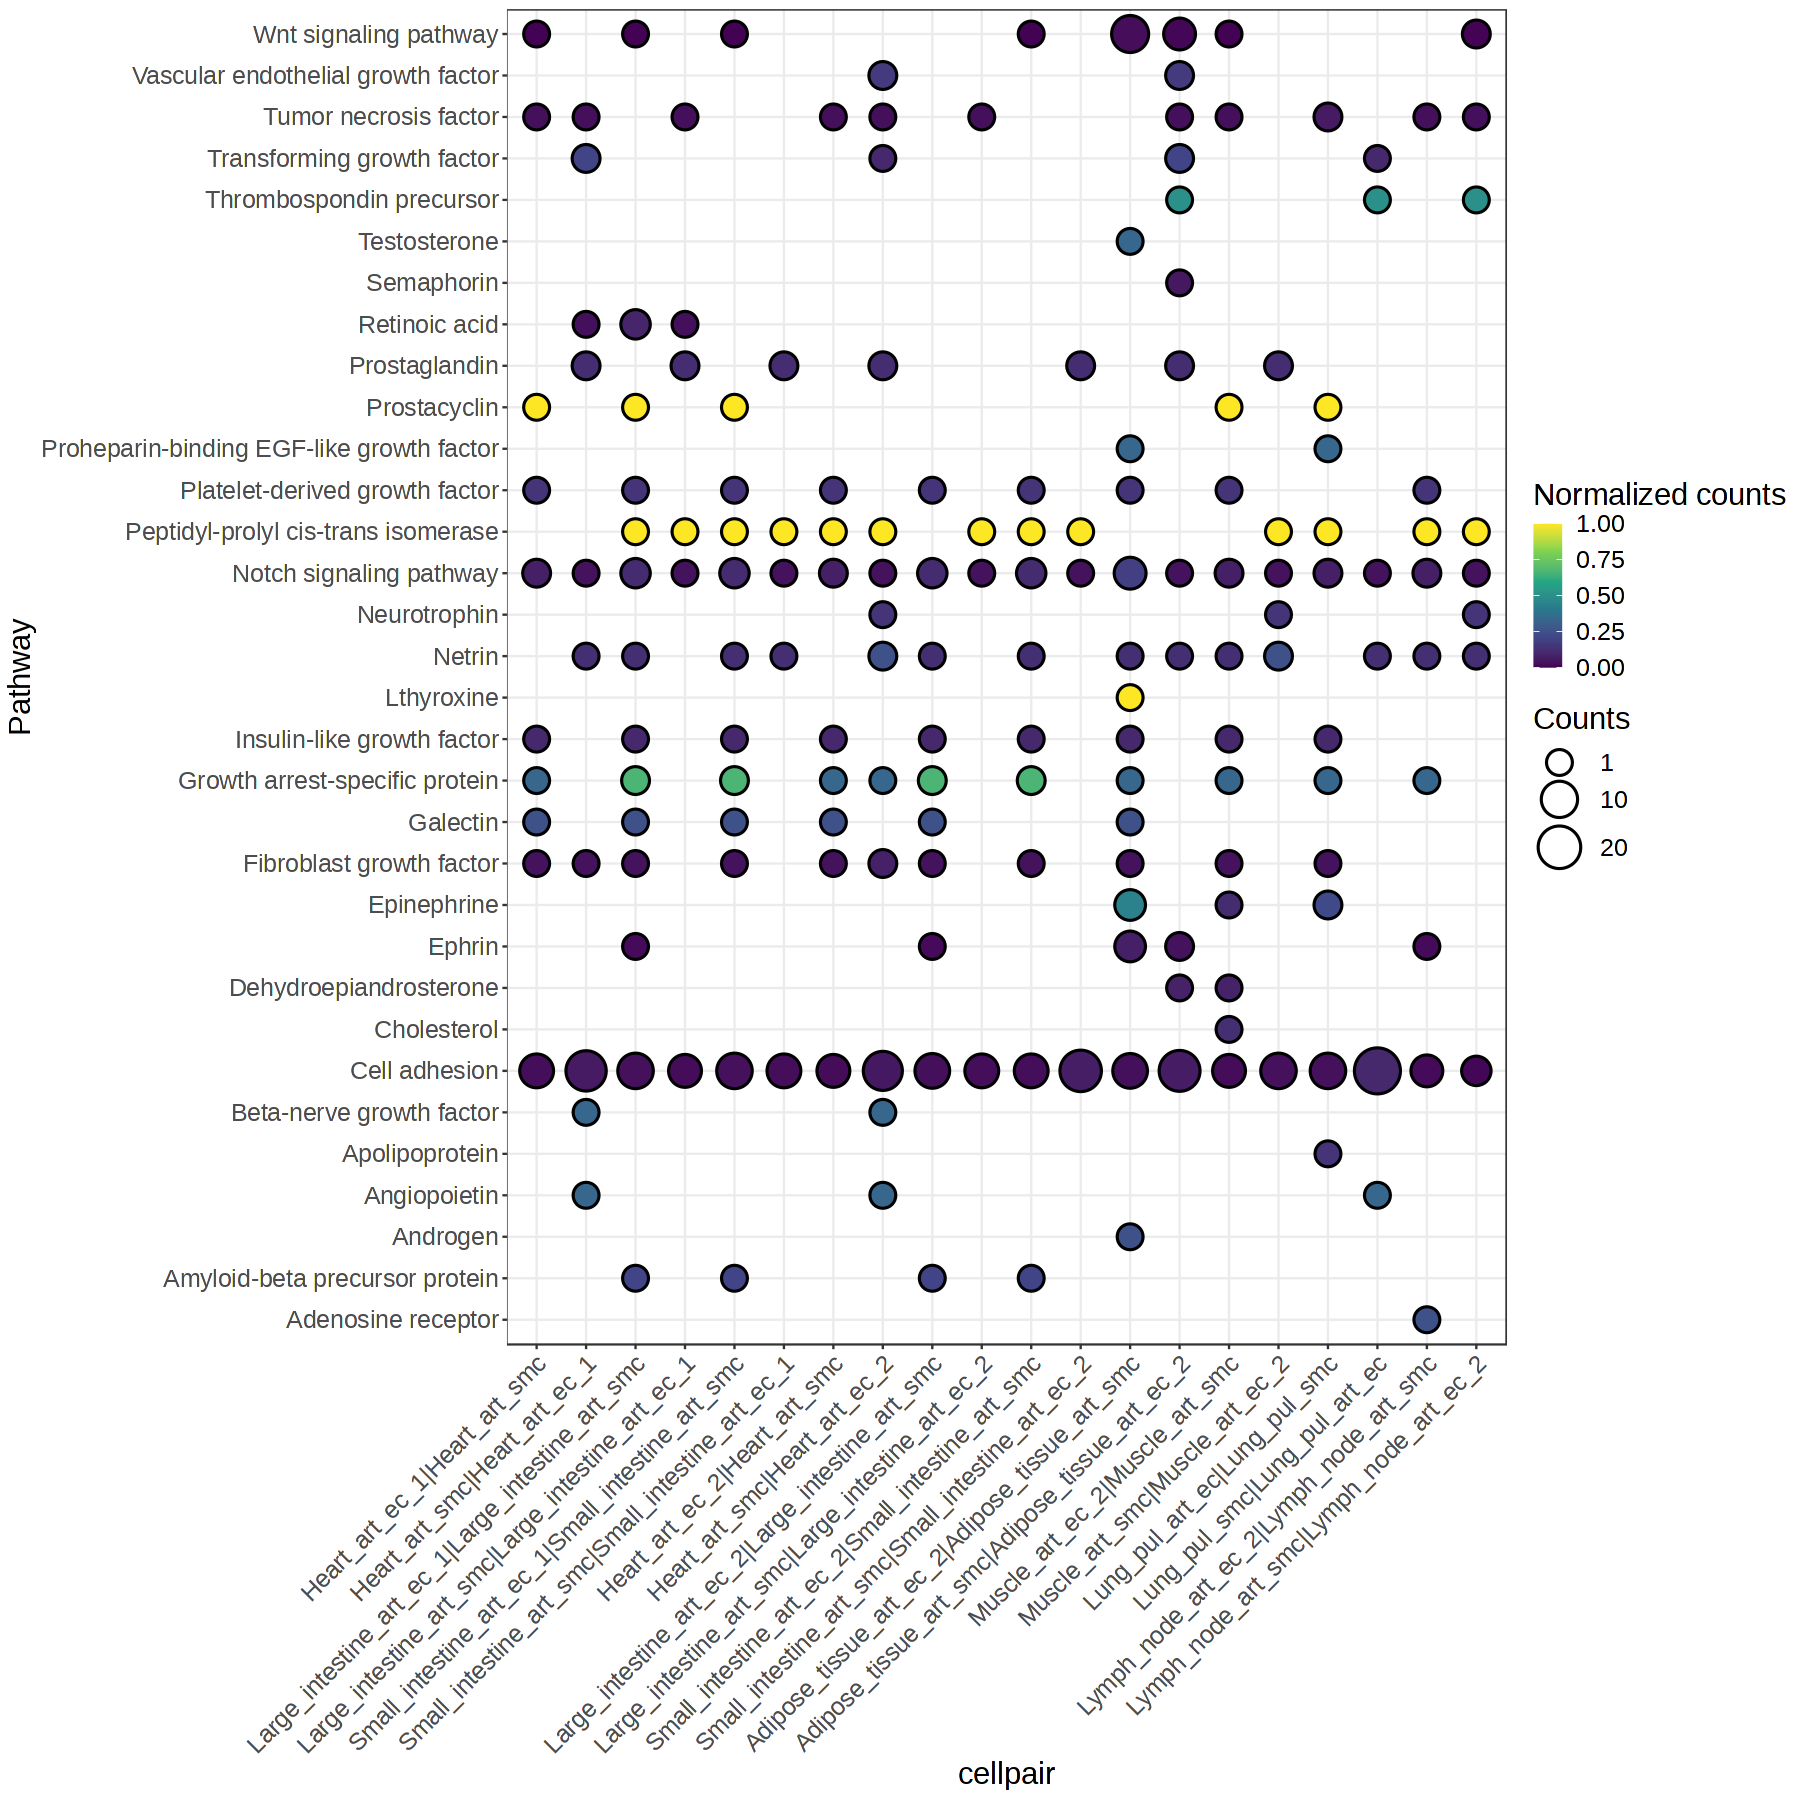

In [126]:
desired_order <- pairs  # Specify the desired order of categories
options(repr.plot.width=15, repr.plot.height=15)
c_map <- c('white', 'red')
names(c_map) <- c('no', 'yes')

p <- ggplot(D_subseted) + geom_point(aes(x=cellpair, y=Pathway, size=count, fill=normalized_counts, alpha = count == 0), pch=21, , stroke = 1) + #subset(D, grepl("Uterus.*Uterus", D$cellpair))
scale_alpha_manual(values = c(1,0)) +
scale_fill_viridis_c() + 
#scale_fill_gradientn(colours = c("blue", "green", "yellow", "white")) +
#scale_fill_manual(values = color_scale) +=
scale_size(breaks = c(1, 10, 20, 30, 40, 50), range = c(5, 12)) +
scale_color_manual(values = c_map, limits = c('yes'), name = "Significant") + 
scale_x_discrete(limits = desired_order) +  # Specify the desired order on the x-axis 
theme_bw() + theme(text = element_text(size = 18, family = "Arial"), axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + #remove if exporting with ggsave: text = element_text(size = 18), 
labs(size='Counts', fill='Normalized counts') +
guides(alpha = 'none')#, size = guide_legend(order = 1), fill = guide_legend(order = 2), colour = guide_legend(order = 3))

#guides(color= guide_legend(), size=guide_legend()) + guides(alpha = 'none') +
#scale_fill_gradientn(colours = c("darkred", "orange", "yellow", "white"))#+ theme(legend.position = "none")

p

ggsave(
  "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_organs_art_smc.png", 
  p,
  width = 15,
  height = 15,
  dpi = 300)

### ven_ec_1_ven_smc_pc in organs of interest

In [127]:
pairs = c("Heart_ven_ec_1|Heart_ven_smc_pc", "Heart_ven_smc_pc|Heart_ven_ec_1",
          "Uterus_ven_ec_1|Uterus_ven_smc_pc", "Uterus_ven_smc_pc|Uterus_ven_ec_1",
          "Bladder_ven_ec_1|Bladder_ven_smc_pc", "Bladder_ven_smc_pc|Bladder_ven_ec_1",
          "Lung_pul_ven_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_ven_ec") 
merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$cellpair %in% pairs, ]

In [128]:
list_of_cell_pairs = pairs

In [129]:
D_subseted <- subset(D, cellpair %in% list_of_cell_pairs)
head(D_subseted)

Pathway            cellpair                          count n
209  Adenosine receptor Heart_ven_ec_1|Heart_ven_smc_pc   0     4
398  Adenosine receptor Lung_pul_smc|Lung_pul_ven_ec      0     4
781  Adenosine receptor Heart_ven_smc_pc|Heart_ven_ec_1   0     4
797  Adenosine receptor Uterus_ven_smc_pc|Uterus_ven_ec_1 0     4
868  Adenosine receptor Uterus_ven_ec_1|Uterus_ven_smc_pc 0     4
1090 Adenosine receptor Lung_pul_ven_ec|Lung_pul_smc      0     4
     normalized_counts
209  0                
398  0                
781  0                
797  0                
868  0                
1090 0

In [130]:
D_subseted <- subset(D_subseted, Pathway %in% pull(subset(D_subseted %>%
              group_by(Pathway) %>%
              summarise(sum_by_group = sum(count)), sum_by_group>0)[,1]))

In [131]:
head (D_subseted)

Pathway  cellpair                          count n normalized_counts
10471 Androgen Lung_pul_smc|Lung_pul_ven_ec      0     4 0.00             
10594 Androgen Uterus_ven_ec_1|Uterus_ven_smc_pc 1     4 0.25             
10693 Androgen Lung_pul_ven_ec|Lung_pul_smc      0     4 0.00             
10751 Androgen Heart_ven_smc_pc|Heart_ven_ec_1   0     4 0.00             
11274 Androgen Heart_ven_ec_1|Heart_ven_smc_pc   0     4 0.00             
11374 Androgen Uterus_ven_smc_pc|Uterus_ven_ec_1 0     4 0.00

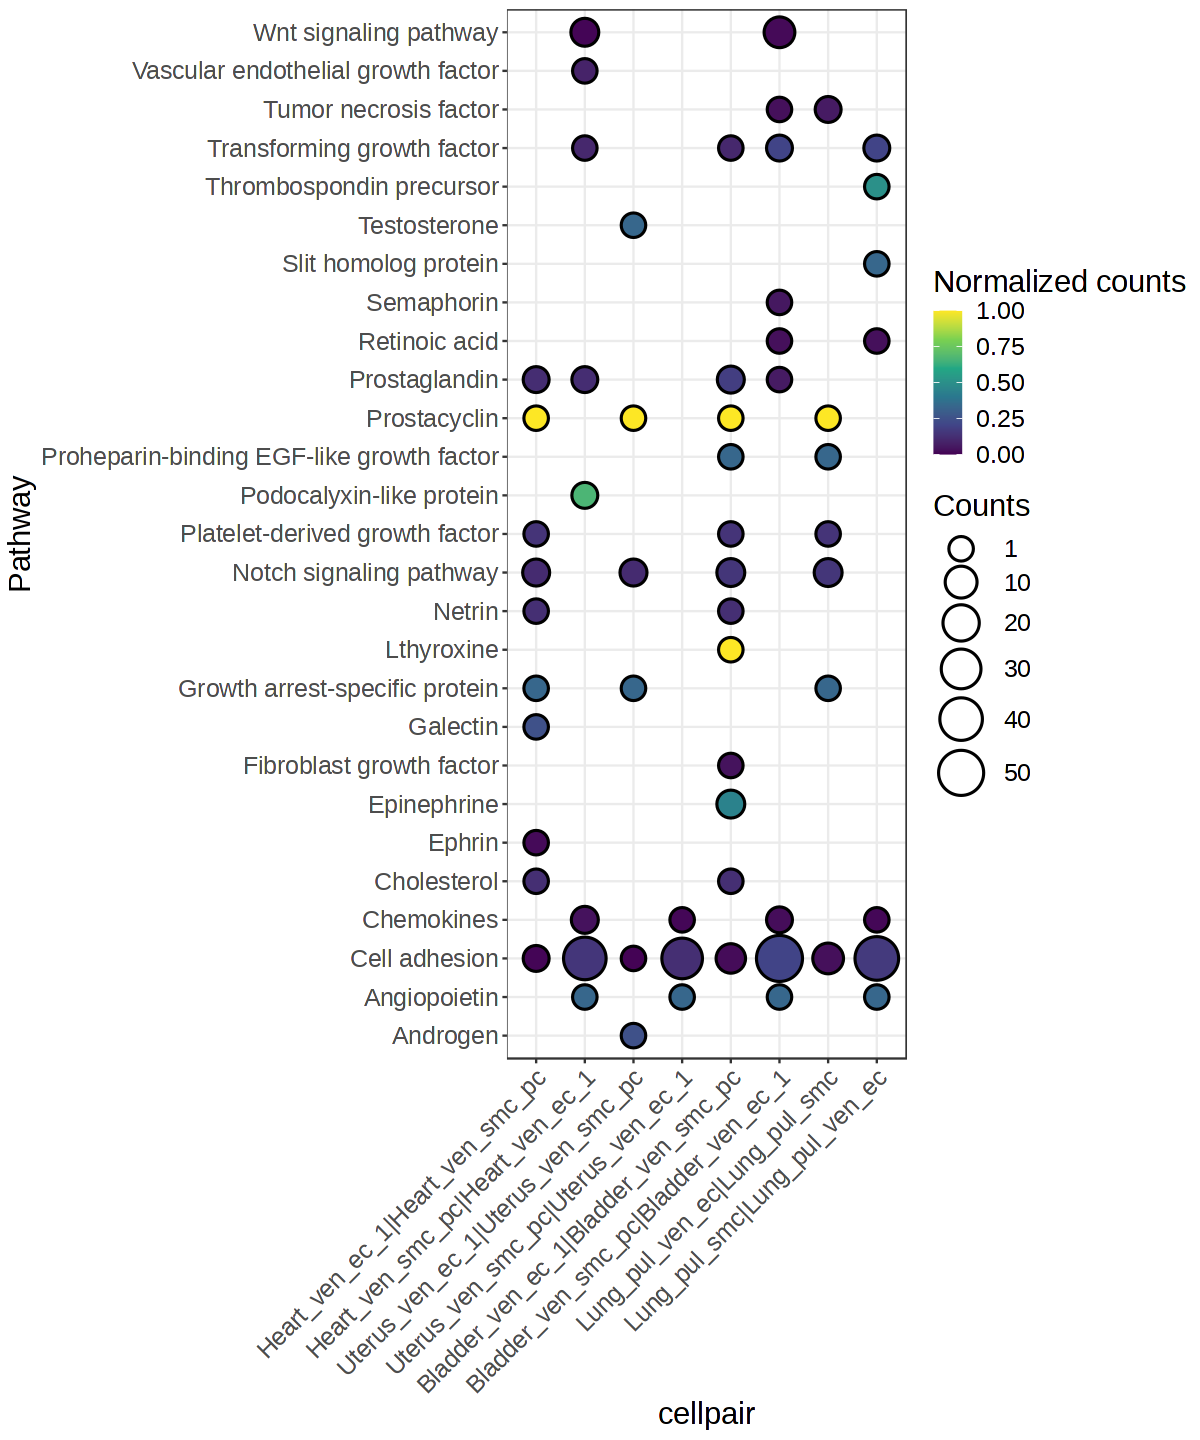

In [132]:
desired_order <- pairs  # Specify the desired order of categories
options(repr.plot.width=10, repr.plot.height=12)
c_map <- c('white', 'red')
names(c_map) <- c('no', 'yes')

p <- ggplot(D_subseted) + geom_point(aes(x=cellpair, y=Pathway, size=count, fill=normalized_counts, alpha = count == 0), pch=21, , stroke = 1) + #subset(D, grepl("Uterus.*Uterus", D$cellpair))
scale_alpha_manual(values = c(1,0)) +
scale_fill_viridis_c() + 
#scale_fill_gradientn(colours = c("blue", "green", "yellow", "white")) +
#scale_fill_manual(values = color_scale) +=
scale_size(breaks = c(1, 10, 20, 30, 40, 50), range = c(5, 12)) +
scale_color_manual(values = c_map, limits = c('yes'), name = "Significant") + 
scale_x_discrete(limits = desired_order) +  # Specify the desired order on the x-axis 
theme_bw() + theme(text = element_text(size = 18, family = "Arial"), axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + #remove if exporting with ggsave: text = element_text(size = 18), 
labs(size='Counts', fill='Normalized counts') +
guides(alpha = 'none')#, size = guide_legend(order = 1), fill = guide_legend(order = 2), colour = guide_legend(order = 3))

#guides(color= guide_legend(), size=guide_legend()) + guides(alpha = 'none') +
#scale_fill_gradientn(colours = c("darkred", "orange", "yellow", "white"))#+ theme(legend.position = "none")

p

ggsave(
  "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_organs_ven_smc.png", 
  p,
  width = 10,
  height = 12,
  dpi = 300)

### cap_pc in organs of interest

In [133]:
pairs = c("Heart_myo_cap_ec|Heart_cap_pc", "Heart_cap_pc|Heart_myo_cap_ec",
          "Muscle_myo_cap_ec|Muscle_cap_pc",  "Muscle_cap_pc|Muscle_myo_cap_ec",
          "Uterus_endometrium_cap_ec|Uterus_cap_pc_endom", "Uterus_cap_pc_endom|Uterus_endometrium_cap_ec",
          "Decidua_endometrium_cap_ec|Decidua_cap_pc",   "Decidua_cap_pc|Decidua_endometrium_cap_ec",
          "Lung_pul_cap_ec|Lung_pul_pc",  "Lung_pul_pc|Lung_pul_cap_ec", 
           "Lung_pul_tip_cap_ec|Lung_pul_pc", "Lung_pul_pc|Lung_pul_tip_cap_ec",
            "Adipose_tissue_adip_cap_ec|Adipose_tissue_cap_pc",  "Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec", 
            "Lymph_node_adip_cap_ec|Lymph_node_cap_pc",  "Lymph_node_cap_pc|Lymph_node_adip_cap_ec", 
            "Thymus_adip_cap_ec|Thymus_cap_pc", "Thymus_cap_pc|Thymus_adip_cap_ec", 
            "Pancreas_cap_ec|Pancreas_cap_pc", "Pancreas_cap_pc|Pancreas_cap_ec") 


merged_dfs_long_subset <- merged_dfs_long[merged_dfs_long$cellpair %in% pairs, ]

In [134]:
list_of_cell_pairs = pairs

In [135]:
D_subseted <- subset(D, cellpair %in% list_of_cell_pairs)
head(D_subseted)

Pathway            cellpair                                 count n
204 Adenosine receptor Lymph_node_cap_pc|Lymph_node_adip_cap_ec 0     4
253 Adenosine receptor Lung_pul_tip_cap_ec|Lung_pul_pc          0     4
269 Adenosine receptor Lung_pul_cap_ec|Lung_pul_pc              0     4
288 Adenosine receptor Lung_pul_pc|Lung_pul_tip_cap_ec          0     4
311 Adenosine receptor Lung_pul_pc|Lung_pul_cap_ec              0     4
330 Adenosine receptor Pancreas_cap_pc|Pancreas_cap_ec          0     4
    normalized_counts
204 0                
253 0                
269 0                
288 0                
311 0                
330 0

In [136]:
D_subseted <- subset(D_subseted, Pathway %in% pull(subset(D_subseted %>%
              group_by(Pathway) %>%
              summarise(sum_by_group = sum(count)), sum_by_group>0)[,1]))

In [137]:
head (D_subseted)

Pathway        cellpair                                         count n
3068 Adrenomedullin Lung_pul_cap_ec|Lung_pul_pc                      0     4
3116 Adrenomedullin Lymph_node_adip_cap_ec|Lymph_node_cap_pc         0     4
3206 Adrenomedullin Pancreas_cap_ec|Pancreas_cap_pc                  0     4
3242 Adrenomedullin Lymph_node_cap_pc|Lymph_node_adip_cap_ec         0     4
3287 Adrenomedullin Muscle_cap_pc|Muscle_myo_cap_ec                  0     4
3333 Adrenomedullin Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec 0     4
     normalized_counts
3068 0                
3116 0                
3206 0                
3242 0                
3287 0                
3333 0

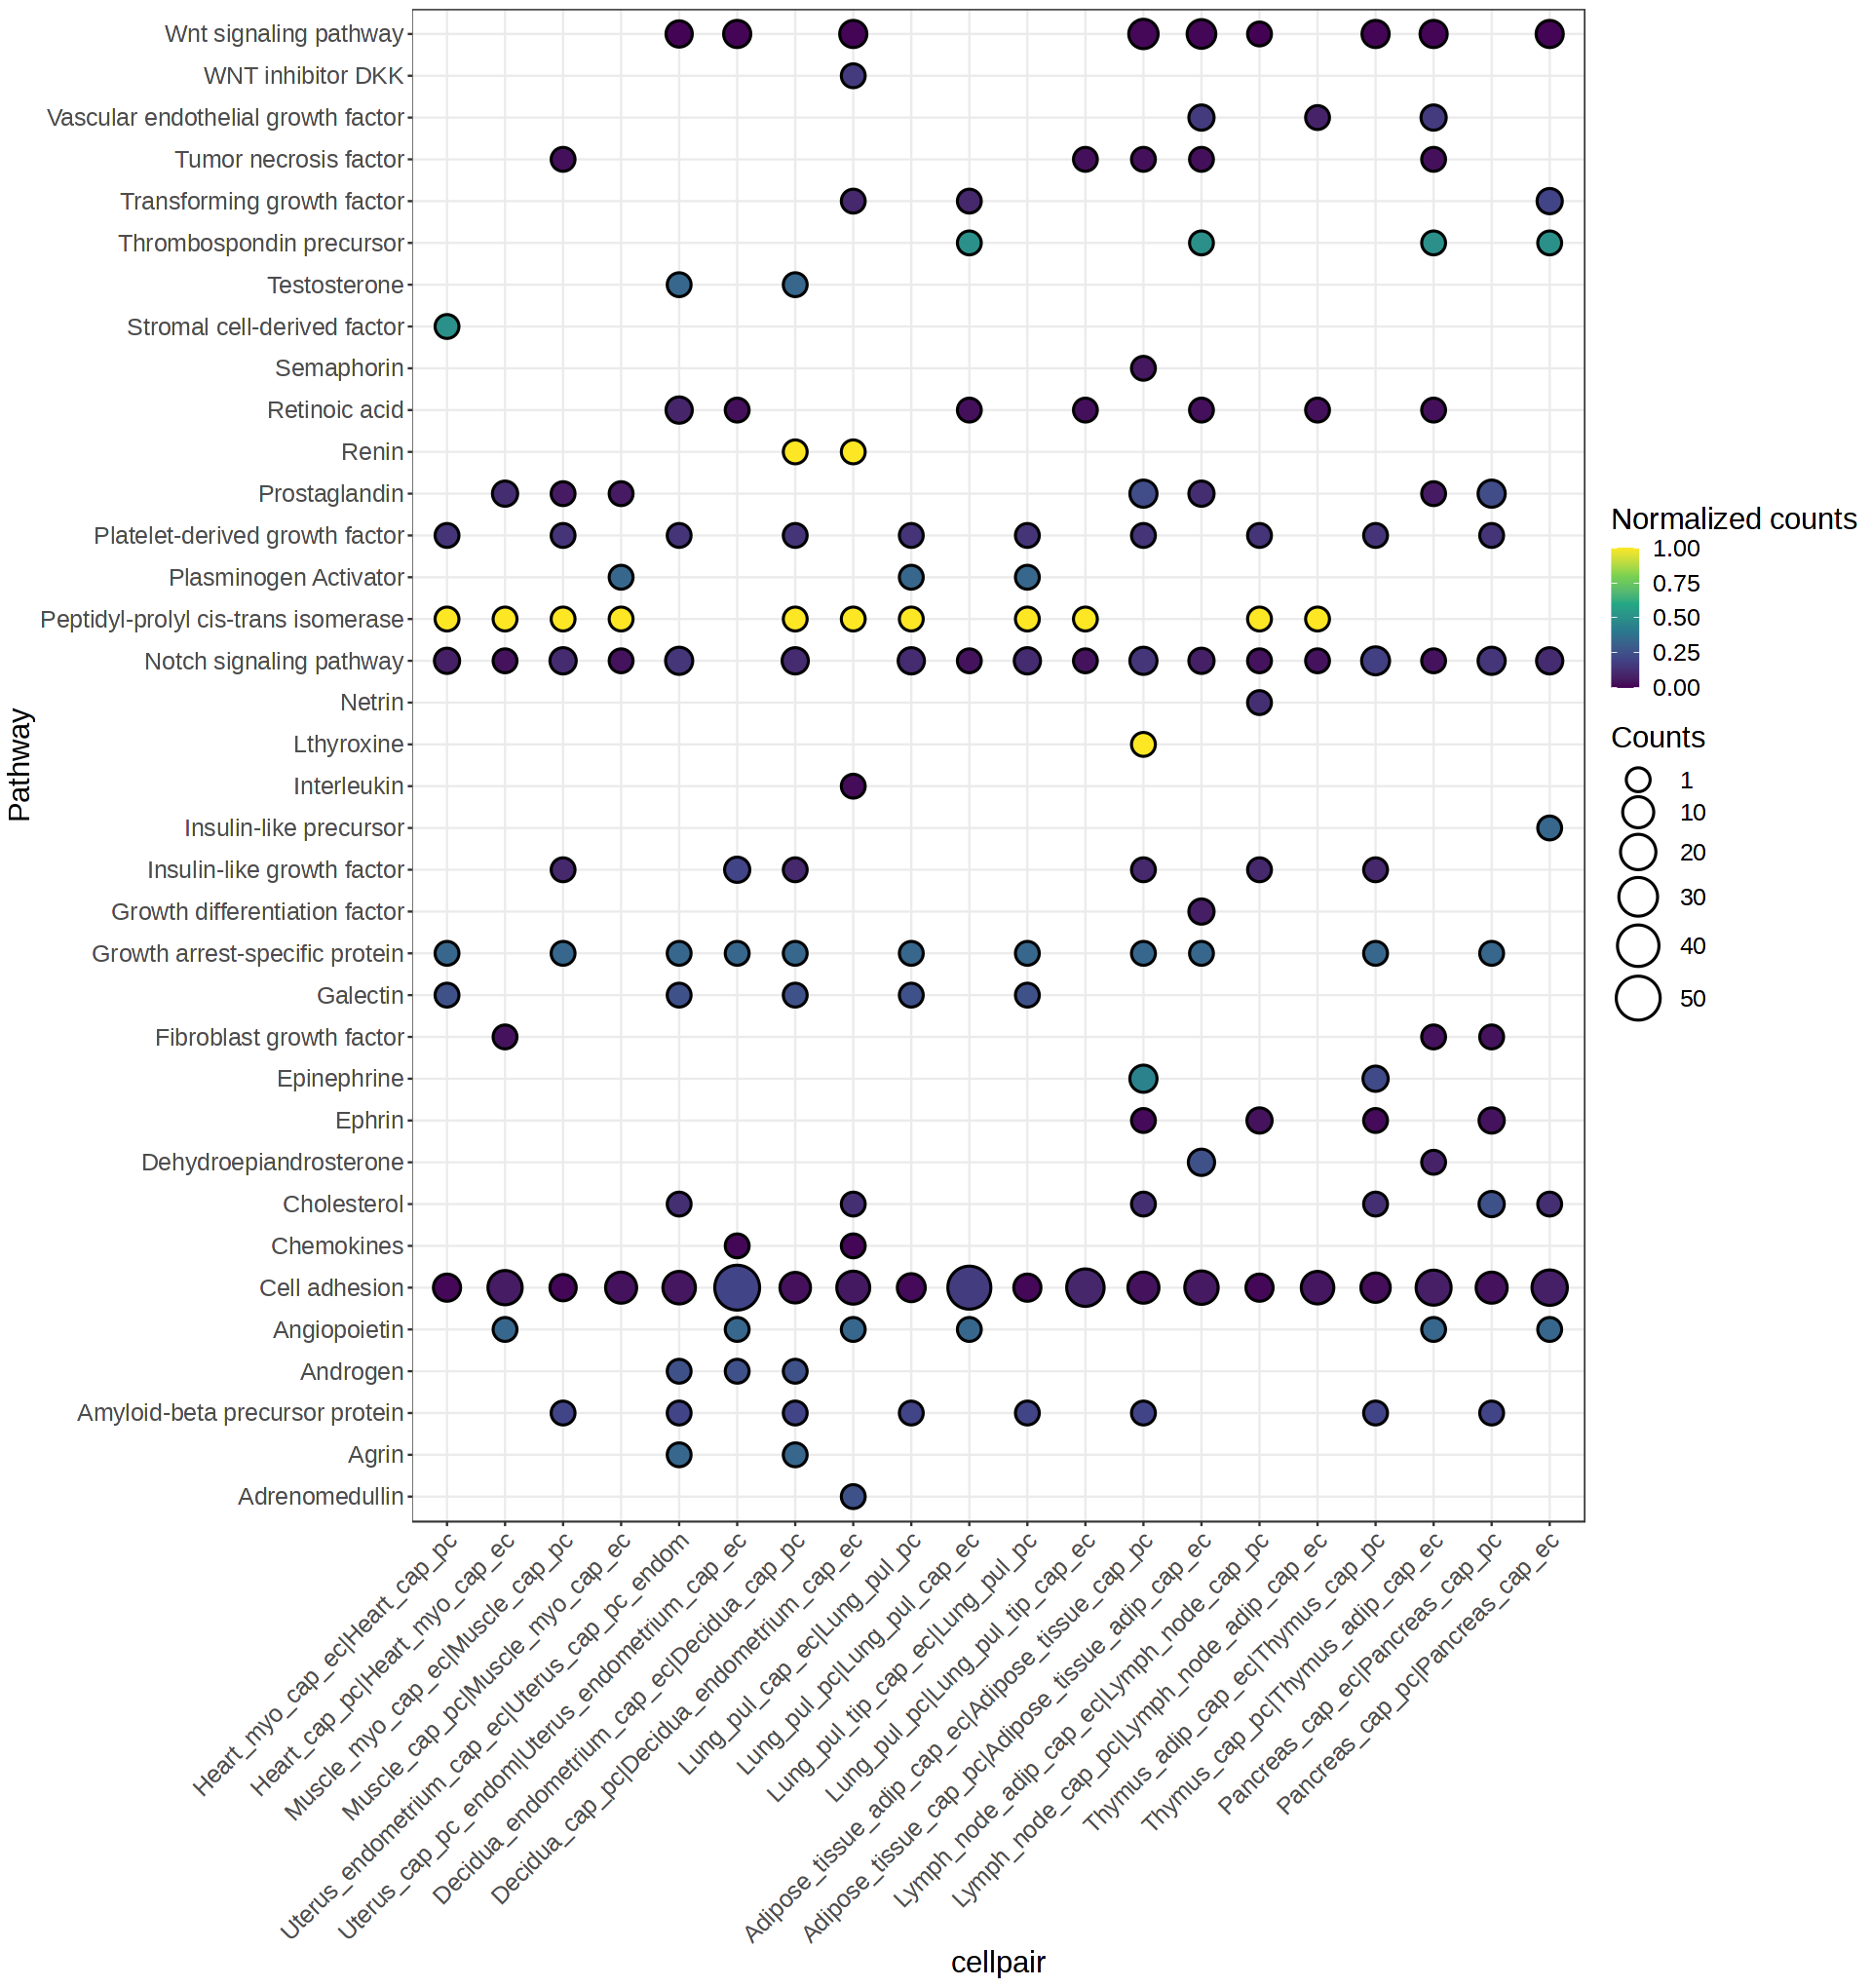

In [140]:
desired_order <- pairs  # Specify the desired order of categories
options(repr.plot.width=16, repr.plot.height=17)
c_map <- c('white', 'red')
names(c_map) <- c('no', 'yes')

p <- ggplot(D_subseted) + geom_point(aes(x=cellpair, y=Pathway, size=count, fill=normalized_counts, alpha = count == 0), pch=21, , stroke = 1) + #subset(D, grepl("Uterus.*Uterus", D$cellpair))
scale_alpha_manual(values = c(1,0)) +
scale_fill_viridis_c() + 
#scale_fill_gradientn(colours = c("blue", "green", "yellow", "white")) +
#scale_fill_manual(values = color_scale) +=
scale_size(breaks = c(1, 10, 20, 30, 40, 50), range = c(5, 12)) +
scale_color_manual(values = c_map, limits = c('yes'), name = "Significant") + 
scale_x_discrete(limits = desired_order) +  # Specify the desired order on the x-axis 
theme_bw() + theme(text = element_text(size = 18, family = "Arial"), axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + #remove if exporting with ggsave: text = element_text(size = 18), 
labs(size='Counts', fill='Normalized counts') +
guides(alpha = 'none')#, size = guide_legend(order = 1), fill = guide_legend(order = 2), colour = guide_legend(order = 3))

#guides(color= guide_legend(), size=guide_legend()) + guides(alpha = 'none') +
#scale_fill_gradientn(colours = c("darkred", "orange", "yellow", "white"))#+ theme(legend.position = "none")

p

ggsave(
  "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_organs_cap_pc.png", 
  p,
  width = 16,
  height = 17,
  dpi = 300)

## ktplots

In [48]:
library(UpSetR)
library(tidyverse)
library(Seurat)
library(devtools)
library(ktplots)
library(dplyr)
library(readxl)
library(stringr)
library(ggplot2)
library(tidyr)
library(dplyr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.2.1     ✔ purrr   1.0.2
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### ktplots

In [49]:
srat <- readRDS("/home/jovyan/1_FIBROSIS/cpdb.rds")
srat

An object of class Seurat 
31402 features across 65964 samples within 1 assay 
Active assay: RNA (31402 features, 0 variable features)

In [77]:
# ok let's read in the cpdb output files.
pvals <- read.delim("/home/jovyan/1_FIBROSIS/cpdb_out/statistical_analysis_pvalues_06_07_2023_15:19:27.txt", check.names = FALSE)
means <- read.delim("/home/jovyan/1_FIBROSIS/cpdb_out/statistical_analysis_means_06_07_2023_15:19:27.txt", check.names = FALSE)
decon <- read.delim("/home/jovyan/1_FIBROSIS/cpdb_out/statistical_analysis_deconvoluted_06_07_2023_15:19:27.txt", check.names = FALSE)

#### art_smc; subset to art ec1_ec2 and compare

In [51]:
select <- c('id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b' ,'gene_a' ,'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 
           "Heart_art_ec_1|Heart_art_smc",
          "Large_intestine_art_ec_1|Large_intestine_art_smc", 
          "Small_intestine_art_ec_1|Small_intestine_art_smc",        
         "Heart_art_ec_2|Heart_art_smc", 
          "Large_intestine_art_ec_2|Large_intestine_art_smc",  
          "Small_intestine_art_ec_2|Small_intestine_art_smc",  
            "Heart_art_smc|Heart_art_ec_1", 
             "Large_intestine_art_smc|Large_intestine_art_ec_1",
            "Small_intestine_art_smc|Small_intestine_art_ec_1",    
            "Large_intestine_art_smc|Large_intestine_art_ec_2",
            "Heart_art_smc|Heart_art_ec_2", 
            "Small_intestine_art_smc|Small_intestine_art_ec_2") 
means_cleaned <- means[select]
pvals_cleaned <- pvals[select]

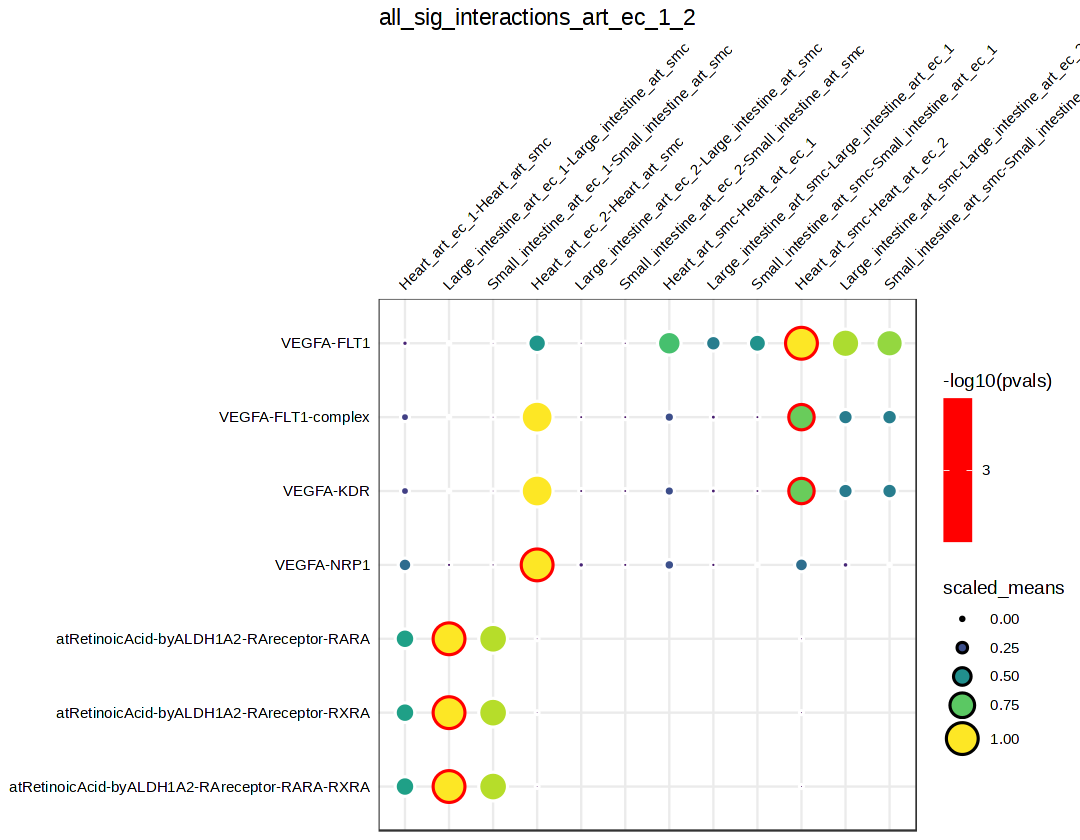

In [55]:
options(repr.plot.height = 7, repr.plot.width = 9)
p = plot_cpdb(cell_type1 = 'art_ec|ven|cap', cell_type2 = 'art_smc|art_smc|pc|smc',
          scdata = srat,
          idents = 'celltype', # column name where the cell ids are located in the metadata
          means = means_cleaned,
          pvals = pvals_cleaned,
            genes = c('VEGFA', 'atRetinoic'),
          standard_scale = TRUE,
          keep_significant_only = TRUE, 
          highlight_size = 1, 
              cluster_rows = FALSE, 
             ) + guides(fill = guide_legend(ncol = 1)) + theme(legend.box = "vertical", text = element_text(family = "Arial"))

# Adjust the factor levels in p$data$Var2
p$data$Var2 <- factor(p$data$Var2, levels = c( "Heart_art_ec_1-Heart_art_smc", 
          "Large_intestine_art_ec_1-Large_intestine_art_smc",  
          "Small_intestine_art_ec_1-Small_intestine_art_smc",       
         "Heart_art_ec_2-Heart_art_smc", 
          "Large_intestine_art_ec_2-Large_intestine_art_smc",  
          "Small_intestine_art_ec_2-Small_intestine_art_smc", 
          "Heart_art_smc-Heart_art_ec_1", 
          "Large_intestine_art_smc-Large_intestine_art_ec_1",
          "Small_intestine_art_smc-Small_intestine_art_ec_1", 
            "Heart_art_smc-Heart_art_ec_2", 
          "Large_intestine_art_smc-Large_intestine_art_ec_2",
          "Small_intestine_art_smc-Small_intestine_art_ec_2"))

p$data$Var1 <- factor(p$data$Var1, levels = rev(c('VEGFA-FLT1', 'VEGFA-FLT1-complex',  'VEGFA-KDR','VEGFA-NRP1', 
           'atRetinoicAcid-byALDH1A2-RAreceptor-RARA', 'atRetinoicAcid-byALDH1A2-RAreceptor-RXRA', 'atRetinoicAcid-byALDH1A2-RAreceptor-RARA-RXRA')))

p = p + ggtitle("all_sig_interactions_art_ec_1_2")
p 

# Save the plot as a PNG file
png_file_path <- "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_sig_interactions_organs_art_ec_1_ec2.png"
ggsave(png_file_path, p, width = 9, height =7, dpi = 300)

#### cap-pc

In [58]:
select <- c('id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b' ,'gene_a' ,'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 
          "Heart_myo_cap_ec|Heart_cap_pc",
          "Muscle_myo_cap_ec|Muscle_cap_pc", 
          "Uterus_endometrium_cap_ec|Uterus_cap_pc_endom", 
          "Decidua_endometrium_cap_ec|Decidua_cap_pc",  
          "Lung_pul_cap_ec|Lung_pul_pc", 
           "Lung_pul_tip_cap_ec|Lung_pul_pc",
            "Adipose_tissue_adip_cap_ec|Adipose_tissue_cap_pc",
            "Lymph_node_adip_cap_ec|Lymph_node_cap_pc", 
            "Thymus_adip_cap_ec|Thymus_cap_pc",
            "Pancreas_cap_ec|Pancreas_cap_pc", 
          "Heart_cap_pc|Heart_myo_cap_ec", "Muscle_cap_pc|Muscle_myo_cap_ec", "Uterus_cap_pc_endom|Uterus_endometrium_cap_ec",
           "Decidua_cap_pc|Decidua_endometrium_cap_ec", "Lung_pul_pc|Lung_pul_cap_ec", "Lung_pul_pc|Lung_pul_tip_cap_ec", 
           "Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec", 
           "Lymph_node_cap_pc|Lymph_node_adip_cap_ec", 
           "Thymus_cap_pc|Thymus_adip_cap_ec", 
           "Pancreas_cap_pc|Pancreas_cap_ec")   

means_cleaned <- means[select]
pvals_cleaned <- pvals[select]

In [72]:
options(repr.plot.height = 10, repr.plot.width = 10)
p = plot_cpdb(cell_type1 = 'art_ec|ven|cap|aerocyte', cell_type2 = 'art_smc|art_smc|pc|smc|aerocyte',
          scdata = srat,
          idents = 'celltype', # column name where the cell ids are located in the metadata
          means = means_cleaned,
          pvals = pvals_cleaned,
          genes = c('ProstaglandinE2', 'WNT5A', "WNT6"),
          standard_scale = TRUE,
          keep_significant_only = TRUE, 
          highlight_size = 1, 
              cluster_rows = TRUE
             ) + guides(fill = guide_legend(ncol = 1)) + theme(legend.box = "vertical", text = element_text(family = "Arial"))

# Adjust the factor levels in p$data$Var2
p$data$Var2 <- factor(p$data$Var2, levels = c( "Heart_myo_cap_ec-Heart_cap_pc", 
                                 "Muscle_myo_cap_ec-Muscle_cap_pc", 
                                 "Uterus_endometrium_cap_ec-Uterus_cap_pc_endom", 
                                 "Decidua_endometrium_cap_ec-Decidua_cap_pc",  
                                 "Lung_pul_cap_ec-Lung_pul_pc",
                                 "Lung_cap_ec-Lung_cap_pc",
                                  "Lung_pul_tip_cap_ec-Lung_pul_pc",
                                  "Lung_aerocyte_ec-Lung_pul_pc",
                                              "Adipose_tissue_adip_cap_ec-Adipose_tissue_cap_pc",
            "Lymph_node_adip_cap_ec-Lymph_node_cap_pc", 
            "Thymus_adip_cap_ec-Thymus_cap_pc",
            "Pancreas_cap_ec-Pancreas_cap_pc",         
                                  "Heart_cap_pc-Heart_myo_cap_ec",
                                 "Muscle_cap_pc-Muscle_myo_cap_ec",  
                                 "Uterus_cap_pc_endom-Uterus_endometrium_cap_ec",
                                 "Decidua_cap_pc-Decidua_endometrium_cap_ec",
                                 "Lung_pul_pc-Lung_pul_cap_ec", 
                                 "Lung_pul_pc-Lung_pul_tip_cap_ec", 
                                 "Lung_pul_pc-Lung_aerocyte_ec", 
                                             "Adipose_tissue_cap_pc-Adipose_tissue_adip_cap_ec", 
           "Lymph_node_cap_pc-Lymph_node_adip_cap_ec", 
           "Thymus_cap_pc-Thymus_adip_cap_ec", 
           "Pancreas_cap_pc-Pancreas_cap_ec"))

p$data$Var1 <- factor(p$data$Var1, levels = rev(c('WNT5A-SFRP1', 'WNT5A-SFRP4', 'WNT5A-FRZB','WNT5A-FZD4-LRP6', 'WNT5A-FZD6-LRP6',
                                                  'WNT6-FZD4-LRP5', 'WNT6-FZD4-LRP6', 'WNT6-FZD6-LRP5', 'WNT6-FZD6-LRP6', 'WNT6-FZD8-LRP5', 'WNT6-FZD8-LRP6',
                                                'ProstaglandinE2-byPTGES2-PTGER1',  'ProstaglandinE2-byPTGES3-PTGER1', 'ProstaglandinE2-byPTGES2-PTGER3', 'ProstaglandinE2-byPTGES3-PTGER3',
                                                  'ProstaglandinE2-byPTGES2-PTGER2',  'ProstaglandinE2-byPTGES3-PTGER2',
 'ProstaglandinE2-byPTGES2-PTGER4',

 'ProstaglandinE2-byPTGES3-PTGER4')))

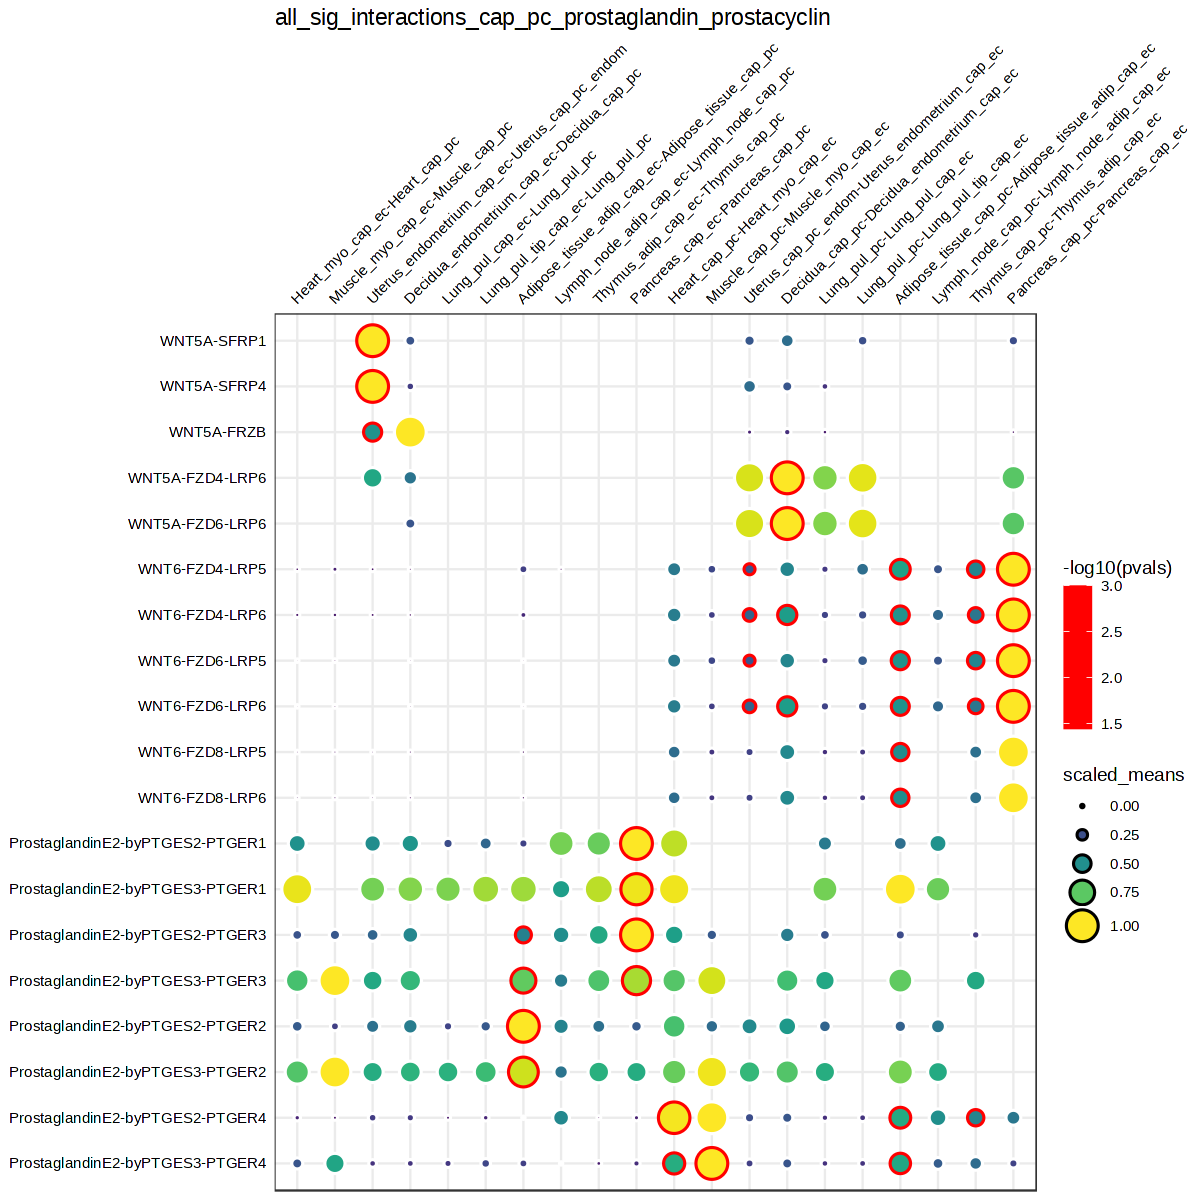

In [73]:
p = p + ggtitle("all_sig_interactions_cap_pc_prostaglandin_prostacyclin")
p 

# Save the plot as a PNG file
png_file_path <- "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_sig_interactions_organs_cap_pc_prostaglandin_prostacyclin_wnt.png"
ggsave(png_file_path, p, width = 10, height = 10, dpi = 300)

#### all sig interactions

In [83]:
select <- c('id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b' ,'gene_a' ,'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy', 'is_integrin', 
           "Heart_art_ec_1|Heart_art_smc",
          "Large_intestine_art_ec_1|Large_intestine_art_smc", 
          "Small_intestine_art_ec_1|Small_intestine_art_smc",        
         "Heart_art_ec_2|Heart_art_smc", 
          "Large_intestine_art_ec_2|Large_intestine_art_smc",  
          "Small_intestine_art_ec_2|Small_intestine_art_smc",  
            "Heart_art_smc|Heart_art_ec_1", 
             "Large_intestine_art_smc|Large_intestine_art_ec_1",
            "Small_intestine_art_smc|Small_intestine_art_ec_1",    
            "Large_intestine_art_smc|Large_intestine_art_ec_2",
            "Heart_art_smc|Heart_art_ec_2", 
            "Small_intestine_art_smc|Small_intestine_art_ec_2", 
          "Heart_ven_ec_1|Heart_ven_smc_pc", "Heart_ven_smc_pc|Heart_ven_ec_1",
          "Uterus_ven_ec_1|Uterus_ven_smc_pc", "Uterus_ven_smc_pc|Uterus_ven_ec_1",
          "Bladder_ven_ec_1|Bladder_ven_smc_pc", "Bladder_ven_smc_pc|Bladder_ven_ec_1",
          "Lung_pul_ven_ec|Lung_pul_smc", "Lung_pul_smc|Lung_pul_ven_ec",
            "Heart_myo_cap_ec|Heart_cap_pc", "Heart_cap_pc|Heart_myo_cap_ec",
          "Muscle_myo_cap_ec|Muscle_cap_pc",  "Muscle_cap_pc|Muscle_myo_cap_ec",
          "Uterus_endometrium_cap_ec|Uterus_cap_pc_endom", "Uterus_cap_pc_endom|Uterus_endometrium_cap_ec",
          "Decidua_endometrium_cap_ec|Decidua_cap_pc",   "Decidua_cap_pc|Decidua_endometrium_cap_ec",
          "Lung_pul_cap_ec|Lung_pul_pc",  "Lung_pul_pc|Lung_pul_cap_ec", 
           "Lung_pul_tip_cap_ec|Lung_pul_pc", "Lung_pul_pc|Lung_pul_tip_cap_ec",
            "Adipose_tissue_adip_cap_ec|Adipose_tissue_cap_pc",  "Adipose_tissue_cap_pc|Adipose_tissue_adip_cap_ec", 
            "Lymph_node_adip_cap_ec|Lymph_node_cap_pc",  "Lymph_node_cap_pc|Lymph_node_adip_cap_ec", 
            "Thymus_adip_cap_ec|Thymus_cap_pc", "Thymus_cap_pc|Thymus_adip_cap_ec", 
            "Pancreas_cap_ec|Pancreas_cap_pc", "Pancreas_cap_pc|Pancreas_cap_ec")   
means_cleaned <- means[select]
pvals_cleaned <- pvals[select]

In [87]:
options(repr.plot.height = 8, repr.plot.width = 18)
p = plot_cpdb(cell_type1 = 'art_ec|ven|cap', cell_type2 = 'art_smc|art_smc|pc|smc',
          scdata = srat,
          idents = 'celltype', # column name where the cell ids are located in the metadata
          means = means_cleaned,
          pvals = pvals_cleaned,
          gene.family = 'notch',
          standard_scale = TRUE,
          keep_significant_only = TRUE, 
          highlight_size = 1, 
              cluster_rows = TRUE
             ) + guides(fill = guide_legend(ncol = 1)) + theme(legend.box = "vertical", text = element_text(family = "Arial"))

# Adjust the factor levels in p$data$Var2
p$data$Var2 <- factor(p$data$Var2, levels = c(  
       "Heart_art_ec_1-Heart_art_smc", 
          "Large_intestine_art_ec_1-Large_intestine_art_smc",  
          "Small_intestine_art_ec_1-Small_intestine_art_smc",       
         "Heart_art_ec_2-Heart_art_smc", 
          "Large_intestine_art_ec_2-Large_intestine_art_smc",  
          "Small_intestine_art_ec_2-Small_intestine_art_smc", 
          "Heart_art_smc-Heart_art_ec_1", 
          "Large_intestine_art_smc-Large_intestine_art_ec_1",
          "Small_intestine_art_smc-Small_intestine_art_ec_1", 
            "Heart_art_smc-Heart_art_ec_2", 
          "Large_intestine_art_smc-Large_intestine_art_ec_2",
          "Small_intestine_art_smc-Small_intestine_art_ec_2", 
    
    "Heart_ven_ec_1-Heart_ven_smc_pc", 
          "Uterus_ven_ec_1-Uterus_ven_smc_pc", 
          "Bladder_ven_ec_1-Bladder_ven_smc_pc", 
          "Lung_pul_ven_ec-Lung_pul_smc", 
    "Heart_ven_smc_pc-Heart_ven_ec_1", 
    "Uterus_ven_smc_pc-Uterus_ven_ec_1", 
    "Bladder_ven_smc_pc-Bladder_ven_ec_1",
    "Lung_pul_smc-Lung_pul_ven_ec", 

    "Heart_myo_cap_ec-Heart_cap_pc", 
                                 "Muscle_myo_cap_ec-Muscle_cap_pc", 
                                 "Uterus_endometrium_cap_ec-Uterus_cap_pc_endom", 
                                 "Decidua_endometrium_cap_ec-Decidua_cap_pc",  
                                 "Lung_pul_cap_ec-Lung_pul_pc",
                                 "Lung_cap_ec-Lung_cap_pc",
                                  "Lung_pul_tip_cap_ec-Lung_pul_pc",
                                  
                                              "Adipose_tissue_adip_cap_ec-Adipose_tissue_cap_pc",
            "Lymph_node_adip_cap_ec-Lymph_node_cap_pc", 
            "Thymus_adip_cap_ec-Thymus_cap_pc",
            "Pancreas_cap_ec-Pancreas_cap_pc",         
                                  "Heart_cap_pc-Heart_myo_cap_ec",
                                 "Muscle_cap_pc-Muscle_myo_cap_ec",  
                                 "Uterus_cap_pc_endom-Uterus_endometrium_cap_ec",
                                 "Decidua_cap_pc-Decidua_endometrium_cap_ec",
                                 "Lung_pul_pc-Lung_pul_cap_ec", 
                                 "Lung_pul_pc-Lung_pul_tip_cap_ec", 
                                 
                                             "Adipose_tissue_cap_pc-Adipose_tissue_adip_cap_ec", 
           "Lymph_node_cap_pc-Lymph_node_adip_cap_ec", 
           "Thymus_cap_pc-Thymus_adip_cap_ec", 
           "Pancreas_cap_pc-Pancreas_cap_ec"
))

In [89]:
unique(p$data$Var1)

[1] DLL1-NOTCH1 DLL1-NOTCH2 DLL1-NOTCH3 DLL1-NOTCH4 DLL4-NOTCH1 DLL4-NOTCH2
 [7] DLL4-NOTCH3 JAG1-CD46   JAG1-NOTCH1 JAG1-NOTCH2 JAG1-NOTCH3 JAG1-NOTCH4
[13] JAG1-VASN   JAG2-NOTCH1 JAG2-NOTCH2 JAG2-NOTCH3 JAG2-VASN  
29 Levels: JAG1-NOTCH3 DLL1-NOTCH3 DLL4-NOTCH3 JAG2-NOTCH3 ... DLK1-NOTCH1

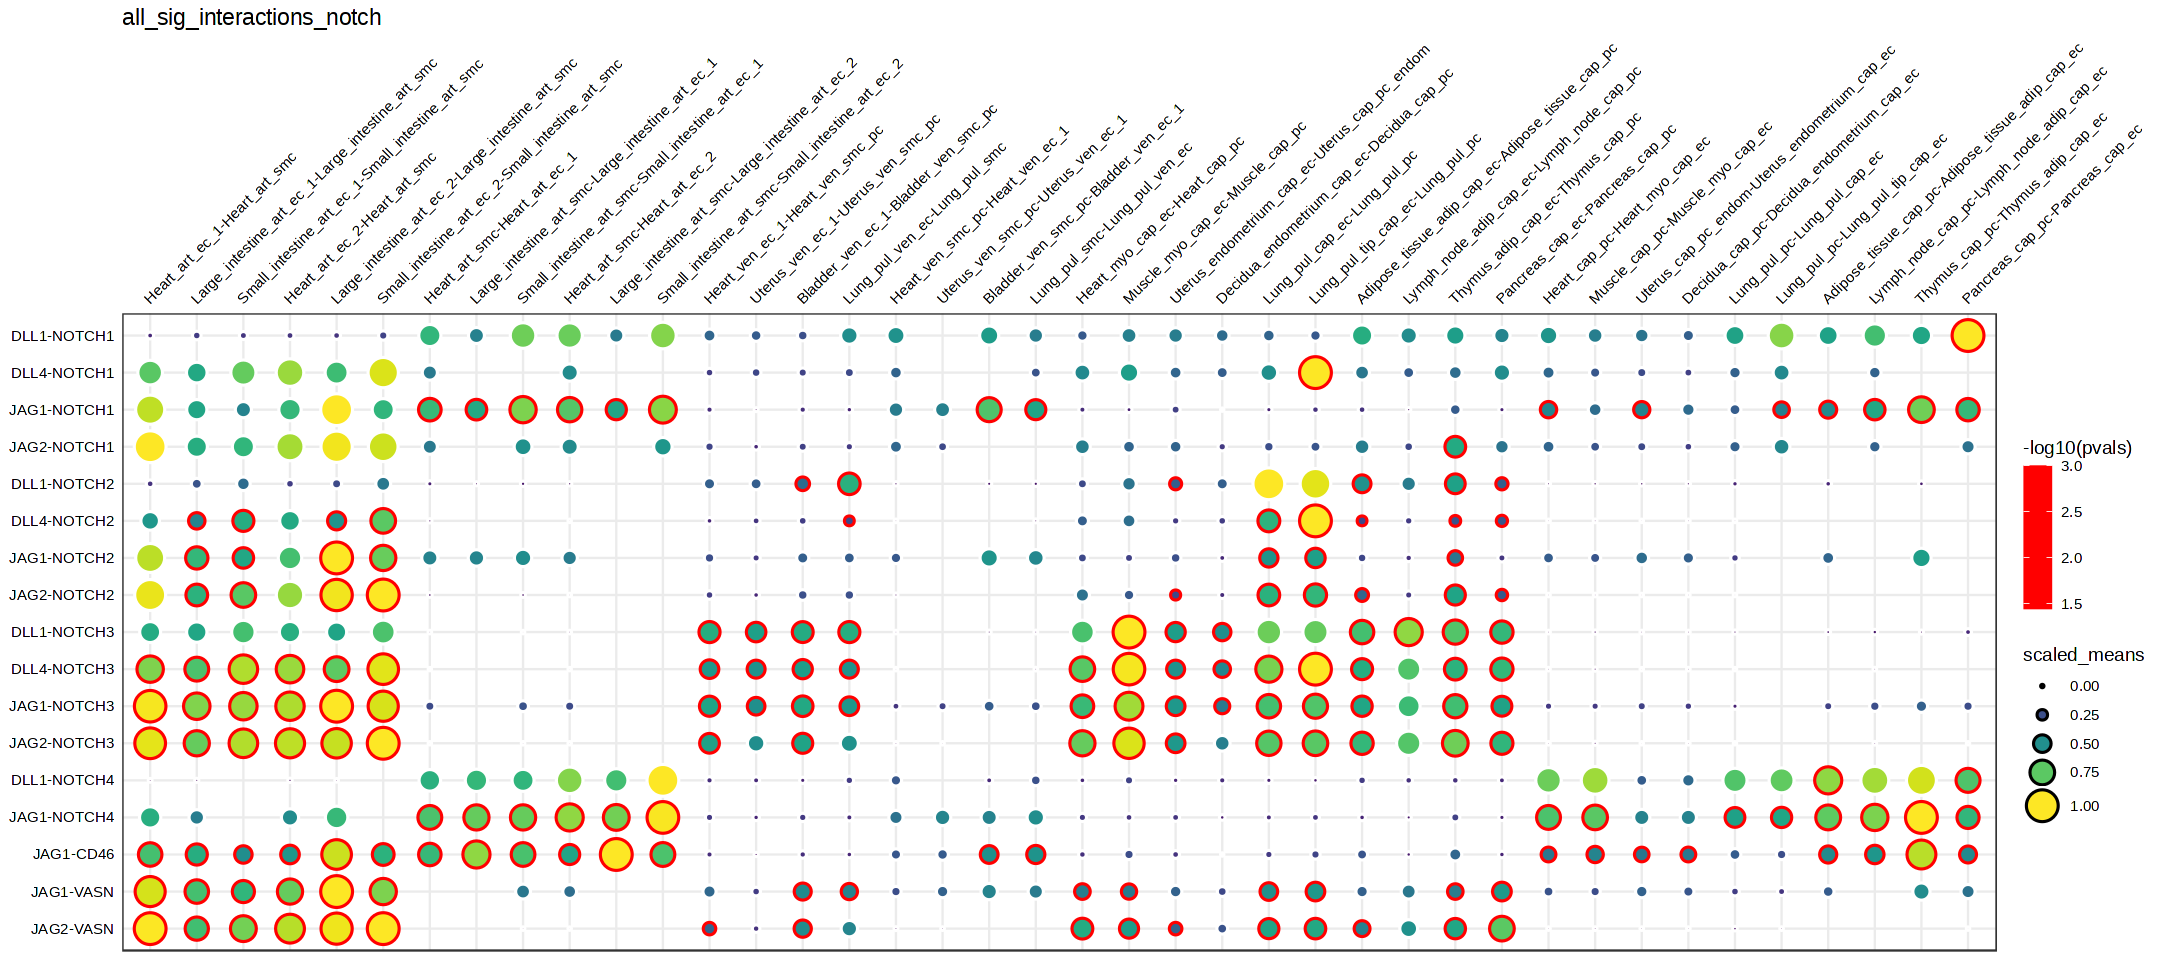

In [90]:
p$data$Var1 <- factor(p$data$Var1, levels = rev(c("DLL1-NOTCH1", 'DLL4-NOTCH1', 'JAG1-NOTCH1', 'JAG2-NOTCH1', 
                                                 'DLL1-NOTCH2', 'DLL4-NOTCH2', 'JAG1-NOTCH2', 'JAG2-NOTCH2', 
                                                 'DLL1-NOTCH3', 'DLL4-NOTCH3', 'JAG1-NOTCH3', 'JAG2-NOTCH3',
                                                 'DLL1-NOTCH4', 'JAG1-NOTCH4',
                                                 'JAG1-CD46', 'JAG1-VASN', 'JAG2-VASN')))

p = p + ggtitle("all_sig_interactions_notch")
p 

# Save the plot as a PNG file
png_file_path <- "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_sig_interactions_organs_notch.png"
ggsave(png_file_path, p, width = 16, height = 8, dpi = 300)

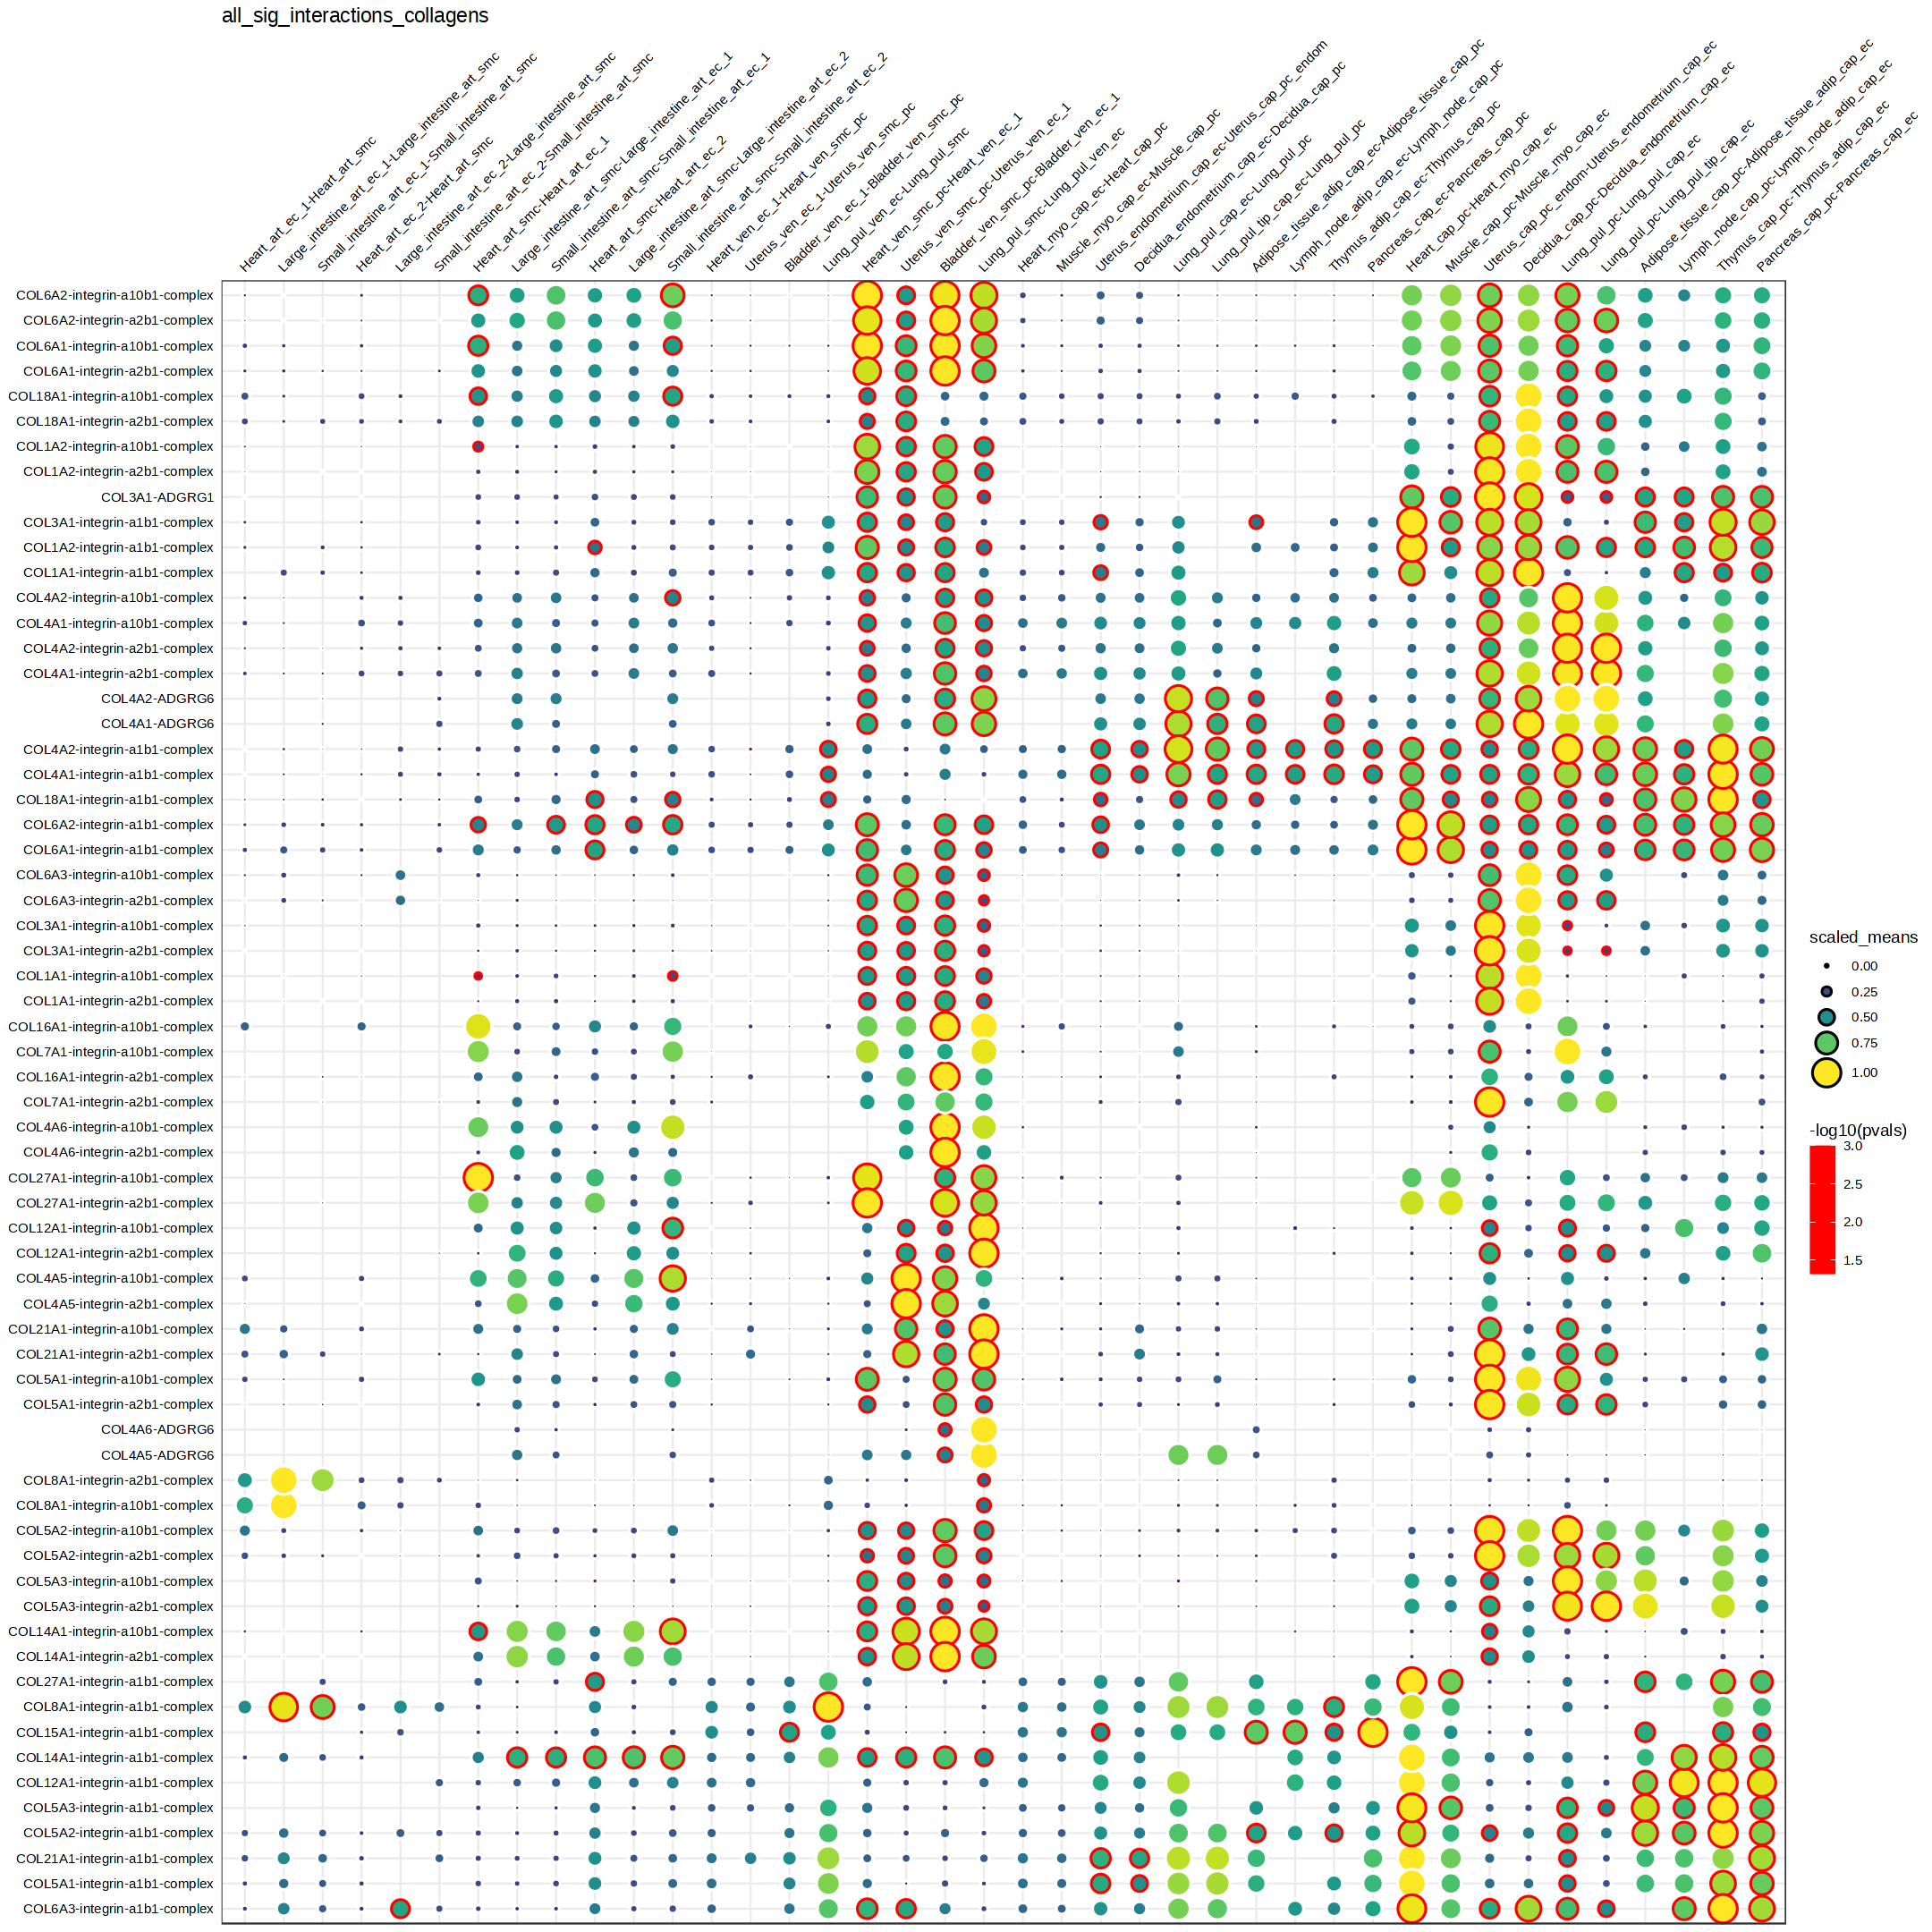

In [91]:
options(repr.plot.height = 18, repr.plot.width = 18)
p = plot_cpdb(cell_type1 = 'art_ec|ven|cap', cell_type2 = 'art_smc|art_smc|pc|smc',
          scdata = srat,
          idents = 'celltype', # column name where the cell ids are located in the metadata
          means = means_cleaned,
          pvals = pvals_cleaned,
          genes = c ('COL'),
          standard_scale = TRUE,
          keep_significant_only = TRUE, 
          highlight_size = 1, 
              cluster_rows = TRUE
             ) + guides(fill = guide_legend(ncol = 1)) + theme(legend.box = "vertical", text = element_text(family = "Arial"))

# Adjust the factor levels in p$data$Var2
p$data$Var2 <- factor(p$data$Var2, levels = c(  
       "Heart_art_ec_1-Heart_art_smc", 
          "Large_intestine_art_ec_1-Large_intestine_art_smc",  
          "Small_intestine_art_ec_1-Small_intestine_art_smc",       
         "Heart_art_ec_2-Heart_art_smc", 
          "Large_intestine_art_ec_2-Large_intestine_art_smc",  
          "Small_intestine_art_ec_2-Small_intestine_art_smc", 
          "Heart_art_smc-Heart_art_ec_1", 
          "Large_intestine_art_smc-Large_intestine_art_ec_1",
          "Small_intestine_art_smc-Small_intestine_art_ec_1", 
            "Heart_art_smc-Heart_art_ec_2", 
          "Large_intestine_art_smc-Large_intestine_art_ec_2",
          "Small_intestine_art_smc-Small_intestine_art_ec_2", 
    
    "Heart_ven_ec_1-Heart_ven_smc_pc", 
          "Uterus_ven_ec_1-Uterus_ven_smc_pc", 
          "Bladder_ven_ec_1-Bladder_ven_smc_pc", 
          "Lung_pul_ven_ec-Lung_pul_smc", 
    "Heart_ven_smc_pc-Heart_ven_ec_1", 
    "Uterus_ven_smc_pc-Uterus_ven_ec_1", 
    "Bladder_ven_smc_pc-Bladder_ven_ec_1",
    "Lung_pul_smc-Lung_pul_ven_ec", 

    "Heart_myo_cap_ec-Heart_cap_pc", 
                                 "Muscle_myo_cap_ec-Muscle_cap_pc", 
                                 "Uterus_endometrium_cap_ec-Uterus_cap_pc_endom", 
                                 "Decidua_endometrium_cap_ec-Decidua_cap_pc",  
                                 "Lung_pul_cap_ec-Lung_pul_pc",
                                 "Lung_cap_ec-Lung_cap_pc",
                                  "Lung_pul_tip_cap_ec-Lung_pul_pc",
                                  
                                              "Adipose_tissue_adip_cap_ec-Adipose_tissue_cap_pc",
            "Lymph_node_adip_cap_ec-Lymph_node_cap_pc", 
            "Thymus_adip_cap_ec-Thymus_cap_pc",
            "Pancreas_cap_ec-Pancreas_cap_pc",         
                                  "Heart_cap_pc-Heart_myo_cap_ec",
                                 "Muscle_cap_pc-Muscle_myo_cap_ec",  
                                 "Uterus_cap_pc_endom-Uterus_endometrium_cap_ec",
                                 "Decidua_cap_pc-Decidua_endometrium_cap_ec",
                                 "Lung_pul_pc-Lung_pul_cap_ec", 
                                 "Lung_pul_pc-Lung_pul_tip_cap_ec", 
                                 
                                             "Adipose_tissue_cap_pc-Adipose_tissue_adip_cap_ec", 
           "Lymph_node_cap_pc-Lymph_node_adip_cap_ec", 
           "Thymus_cap_pc-Thymus_adip_cap_ec", 
           "Pancreas_cap_pc-Pancreas_cap_ec"
))

p = p + ggtitle("all_sig_interactions_collagens")
p 

# Save the plot as a PNG file
png_file_path <- "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_sig_interactions_organs_collagens.png"
ggsave(png_file_path, p, width = 18, height = 18, dpi = 300)

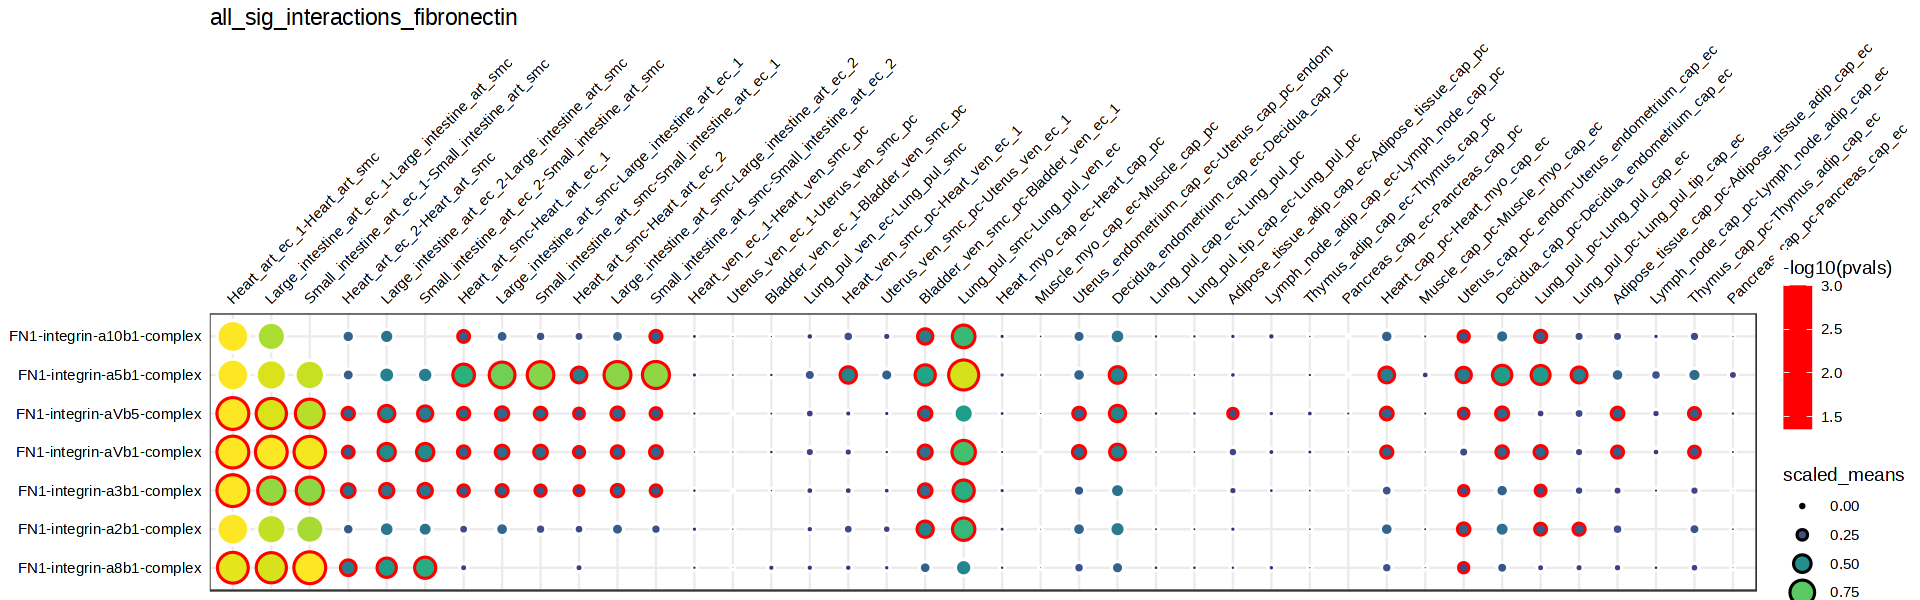

In [93]:
options(repr.plot.height = 5, repr.plot.width = 16)
p = plot_cpdb(cell_type1 = 'art_ec|ven|cap', cell_type2 = 'art_smc|art_smc|pc|smc',
          scdata = srat,
          idents = 'celltype', # column name where the cell ids are located in the metadata
          means = means_cleaned,
          pvals = pvals_cleaned,
          genes = c ('FN1'),
          standard_scale = TRUE,
          keep_significant_only = TRUE, 
          highlight_size = 1, 
              cluster_rows = TRUE
             ) + guides(fill = guide_legend(ncol = 1)) + theme(legend.box = "vertical", text = element_text(family = "Arial"))

# Adjust the factor levels in p$data$Var2
p$data$Var2 <- factor(p$data$Var2, levels = c(  
       "Heart_art_ec_1-Heart_art_smc", 
          "Large_intestine_art_ec_1-Large_intestine_art_smc",  
          "Small_intestine_art_ec_1-Small_intestine_art_smc",       
         "Heart_art_ec_2-Heart_art_smc", 
          "Large_intestine_art_ec_2-Large_intestine_art_smc",  
          "Small_intestine_art_ec_2-Small_intestine_art_smc", 
          "Heart_art_smc-Heart_art_ec_1", 
          "Large_intestine_art_smc-Large_intestine_art_ec_1",
          "Small_intestine_art_smc-Small_intestine_art_ec_1", 
            "Heart_art_smc-Heart_art_ec_2", 
          "Large_intestine_art_smc-Large_intestine_art_ec_2",
          "Small_intestine_art_smc-Small_intestine_art_ec_2", 
    
    "Heart_ven_ec_1-Heart_ven_smc_pc", 
          "Uterus_ven_ec_1-Uterus_ven_smc_pc", 
          "Bladder_ven_ec_1-Bladder_ven_smc_pc", 
          "Lung_pul_ven_ec-Lung_pul_smc", 
    "Heart_ven_smc_pc-Heart_ven_ec_1", 
    "Uterus_ven_smc_pc-Uterus_ven_ec_1", 
    "Bladder_ven_smc_pc-Bladder_ven_ec_1",
    "Lung_pul_smc-Lung_pul_ven_ec", 

    "Heart_myo_cap_ec-Heart_cap_pc", 
                                 "Muscle_myo_cap_ec-Muscle_cap_pc", 
                                 "Uterus_endometrium_cap_ec-Uterus_cap_pc_endom", 
                                 "Decidua_endometrium_cap_ec-Decidua_cap_pc",  
                                 "Lung_pul_cap_ec-Lung_pul_pc",
                                 "Lung_cap_ec-Lung_cap_pc",
                                  "Lung_pul_tip_cap_ec-Lung_pul_pc",
                                  
                                              "Adipose_tissue_adip_cap_ec-Adipose_tissue_cap_pc",
            "Lymph_node_adip_cap_ec-Lymph_node_cap_pc", 
            "Thymus_adip_cap_ec-Thymus_cap_pc",
            "Pancreas_cap_ec-Pancreas_cap_pc",         
                                  "Heart_cap_pc-Heart_myo_cap_ec",
                                 "Muscle_cap_pc-Muscle_myo_cap_ec",  
                                 "Uterus_cap_pc_endom-Uterus_endometrium_cap_ec",
                                 "Decidua_cap_pc-Decidua_endometrium_cap_ec",
                                 "Lung_pul_pc-Lung_pul_cap_ec", 
                                 "Lung_pul_pc-Lung_pul_tip_cap_ec", 
                                 
                                             "Adipose_tissue_cap_pc-Adipose_tissue_adip_cap_ec", 
           "Lymph_node_cap_pc-Lymph_node_adip_cap_ec", 
           "Thymus_cap_pc-Thymus_adip_cap_ec", 
           "Pancreas_cap_pc-Pancreas_cap_ec"
))

p = p + ggtitle("all_sig_interactions_fibronectin")
p 

# Save the plot as a PNG file
png_file_path <- "/home/jovyan/1_FIBROSIS/cpdb_out/paper_figures/all_sig_interactions_organs_fibronectin.png"
ggsave(png_file_path, p, width = 16, height = 5, dpi = 300)